   year  lgID tmID franchID confID  divID  rank  playoff  seeded firstRound  \
0     9  WNBA  ATL      ATL     EA    NaN     7        0       0        NaN   
1    10  WNBA  ATL      ATL     EA    NaN     2        1       0          L   
2     1  WNBA  CHA      CHA     EA    NaN     8        0       0        NaN   
3     2  WNBA  CHA      CHA     EA    NaN     4        1       0          W   
4     3  WNBA  CHA      CHA     EA    NaN     2        1       0          L   

   ... mean_diff_pts mean_diff_tmORB mean_diff_tmDRB  mean_diff_tmTRB  \
0  ...   -345.000000             0.0             0.0              0.0   
1  ...    -72.333333             0.0             0.0              0.0   
2  ...   -243.000000             0.0             0.0              0.0   
3  ...    -50.333333             0.0             0.0              0.0   
4  ...     87.333333             0.0             0.0              0.0   

   mean_diff_won  mean_diff_homeW  mean_diff_awayW  mean_diff_confW  \
0     -26.00000

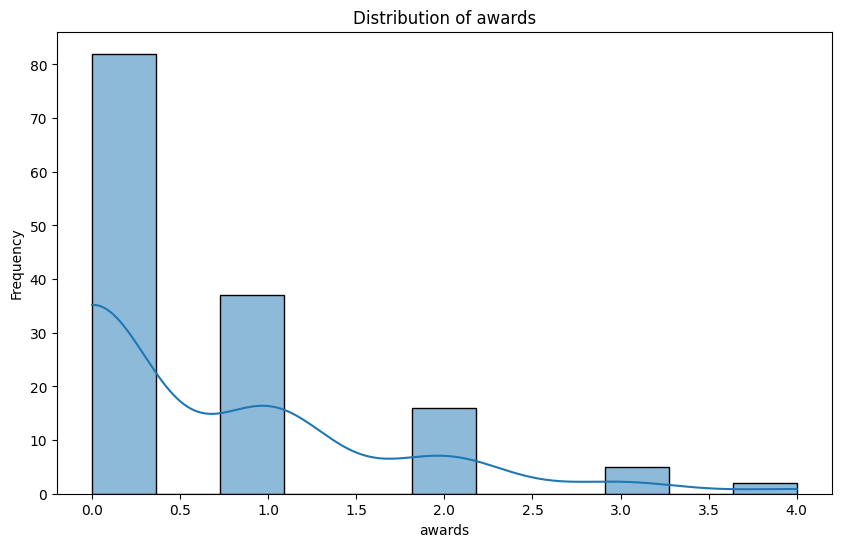

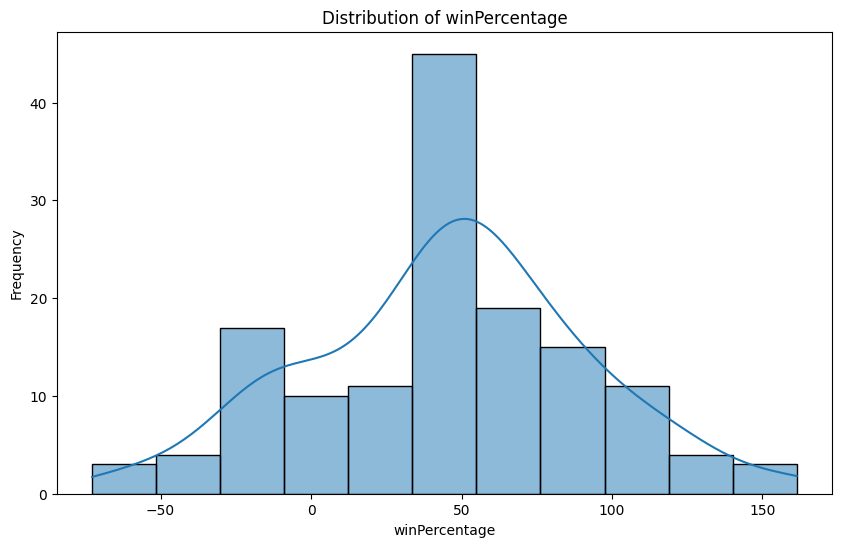

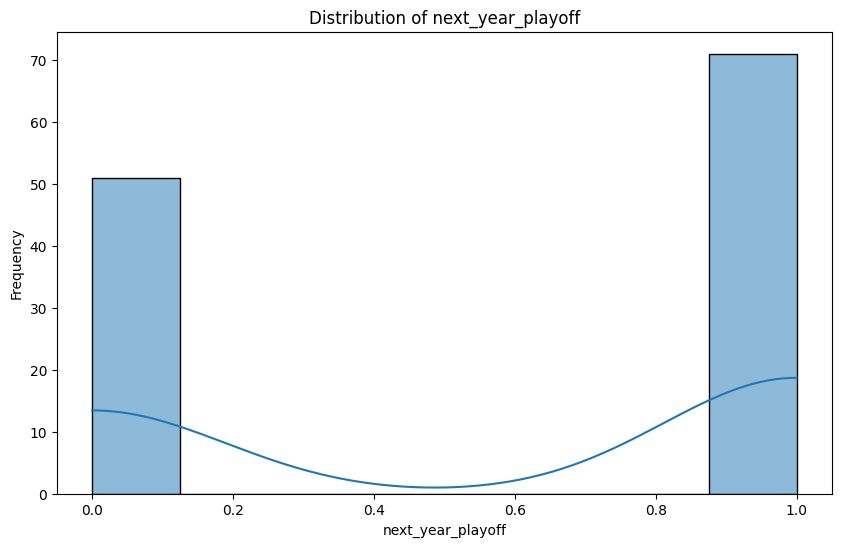

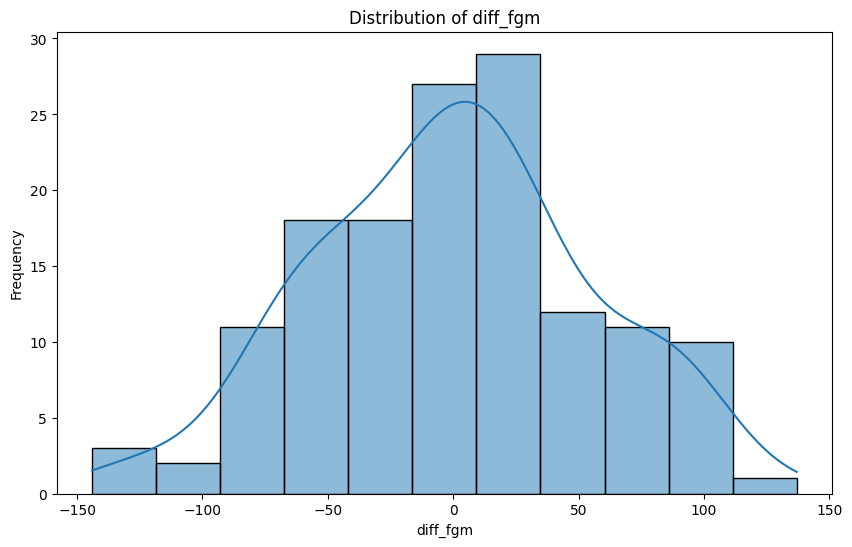

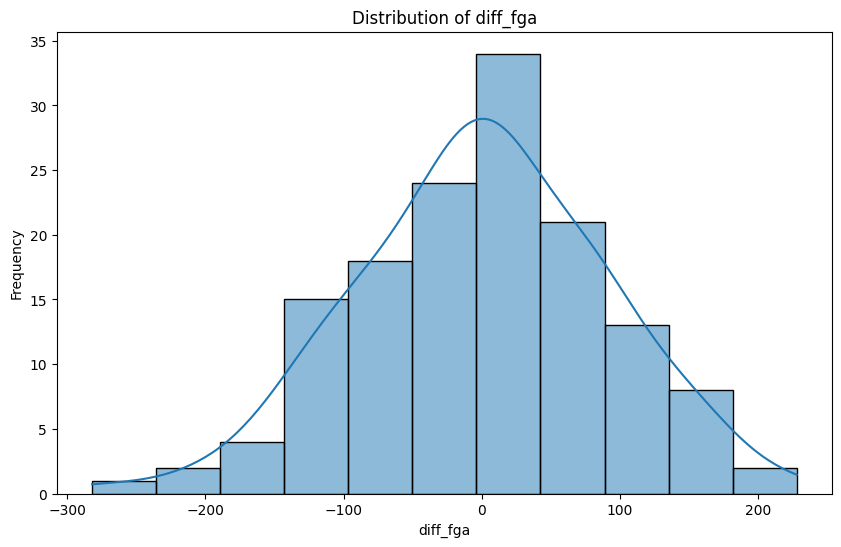

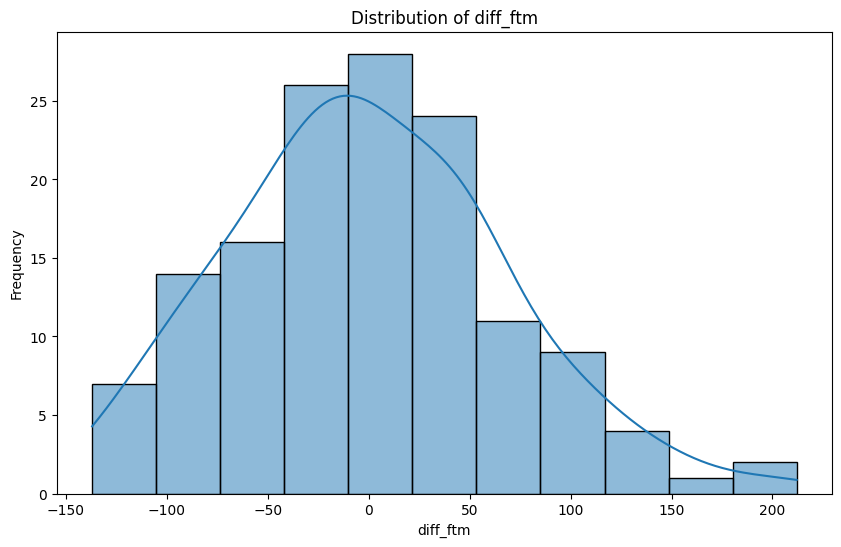

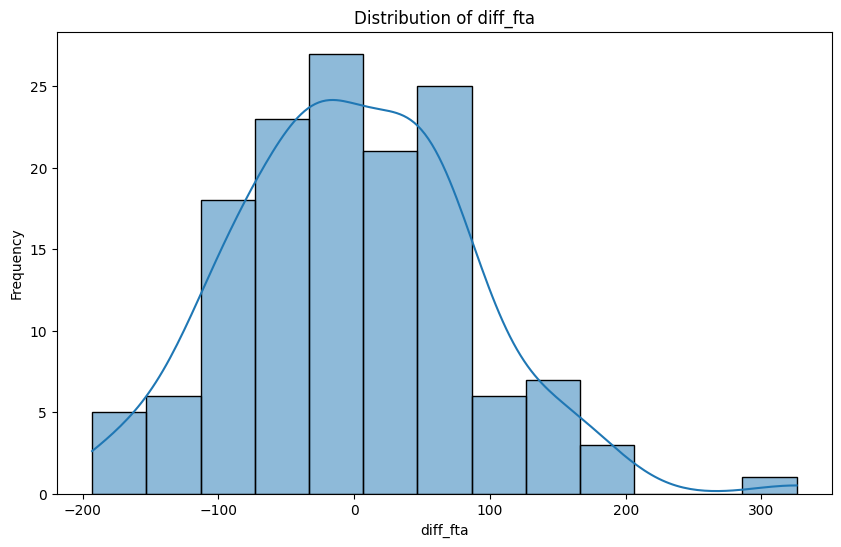

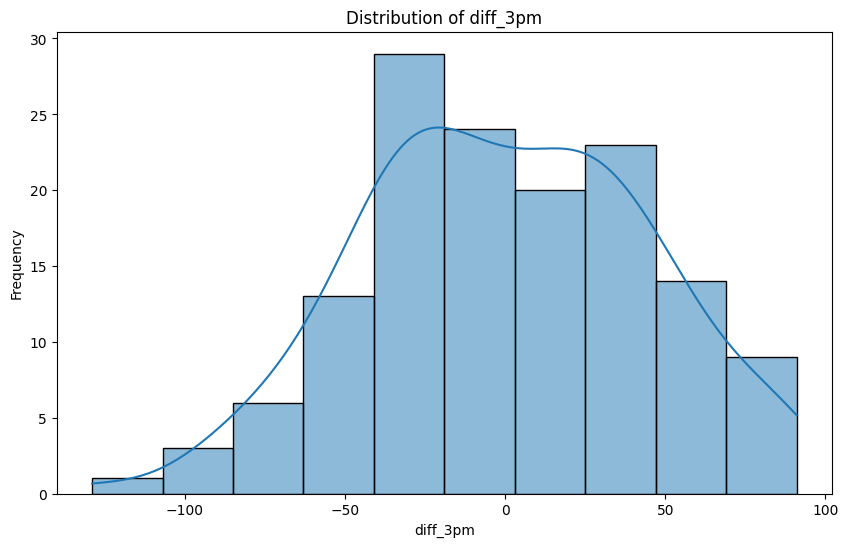

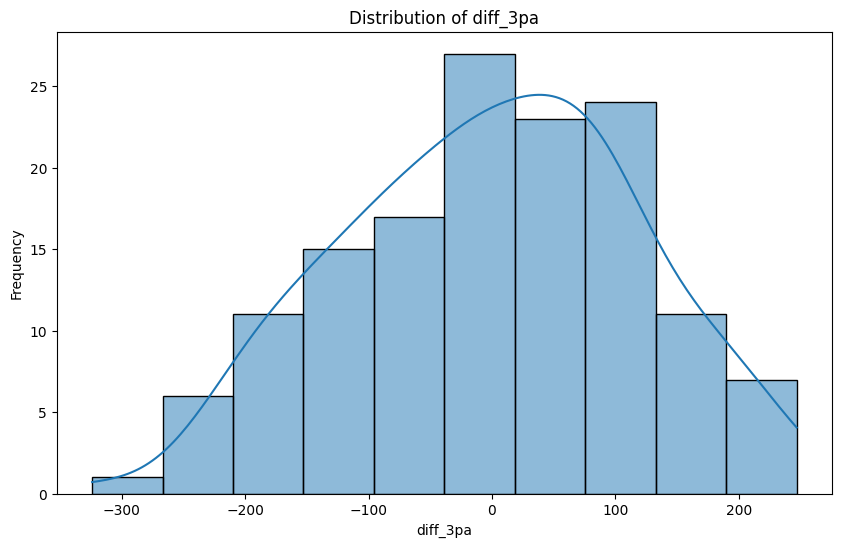

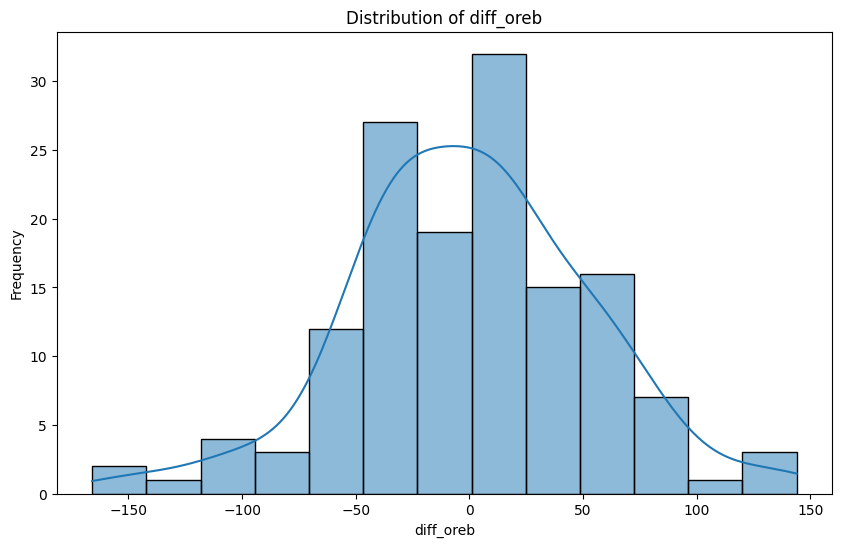

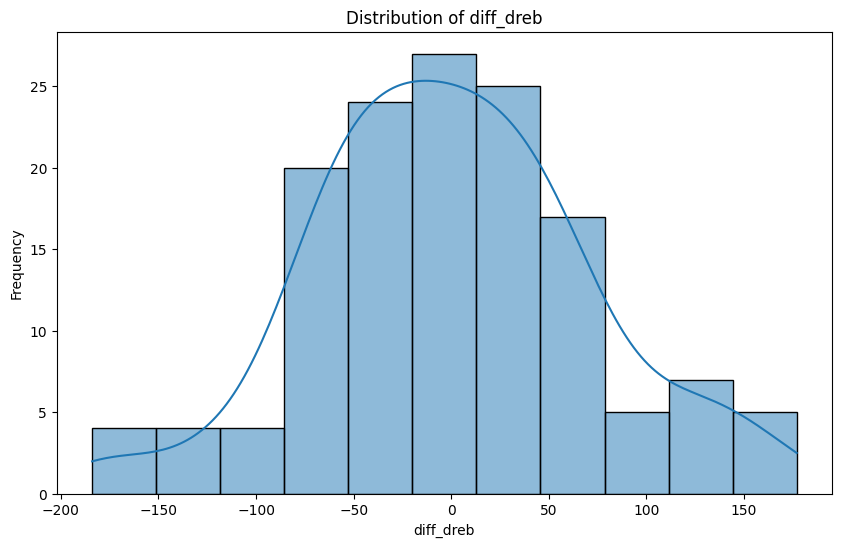

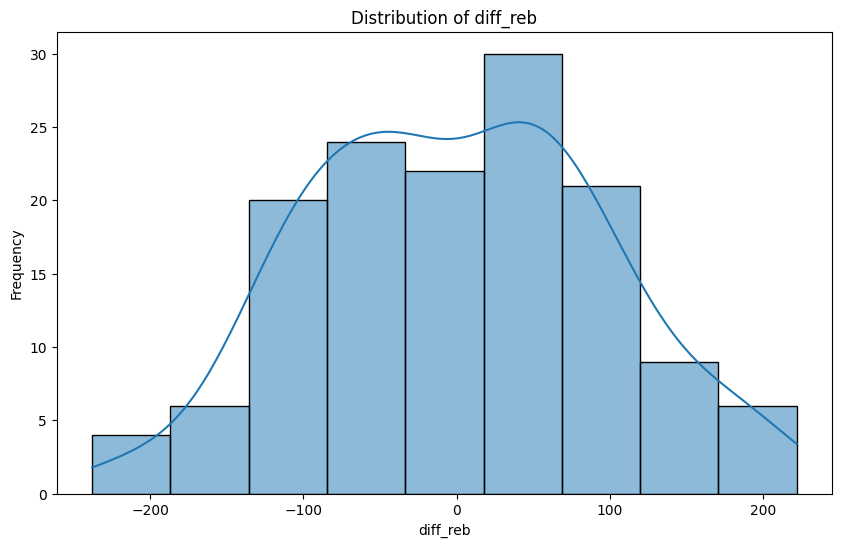

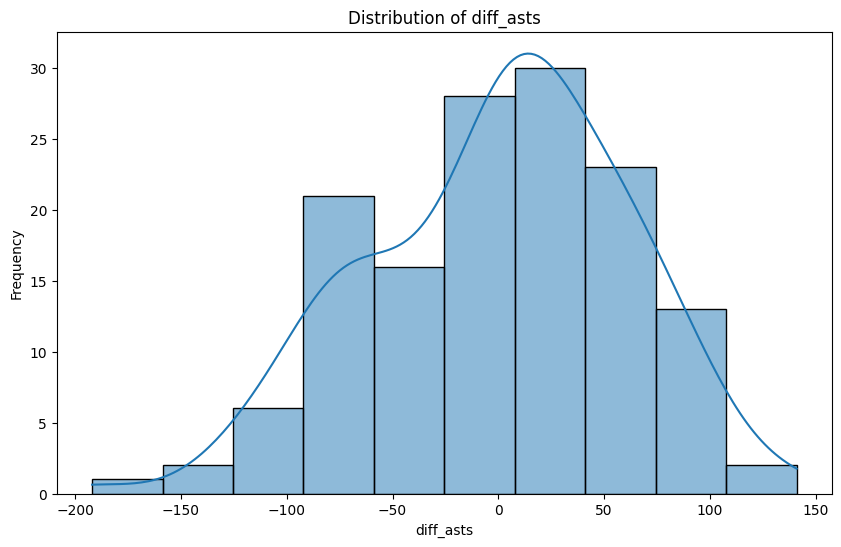

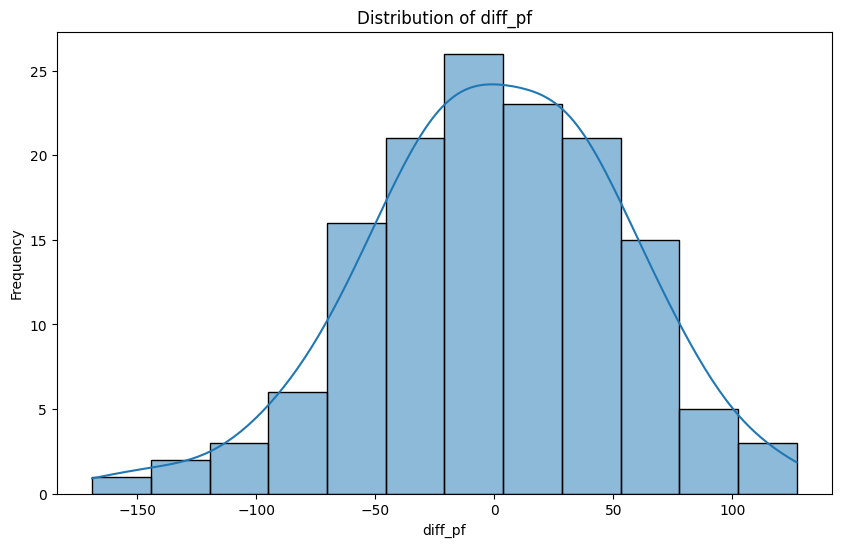

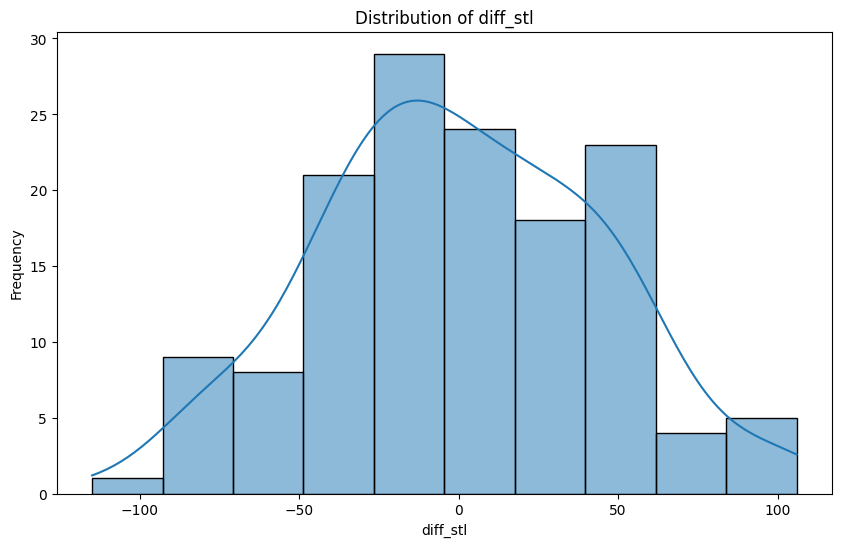

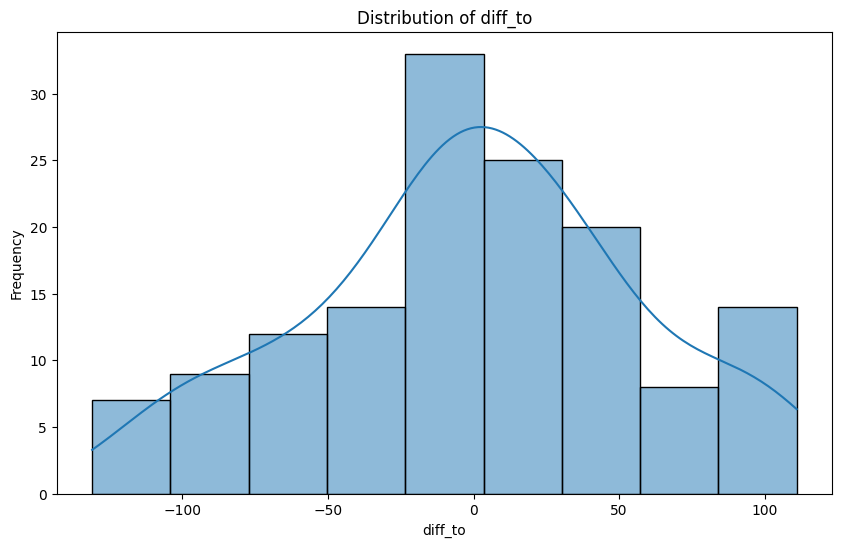

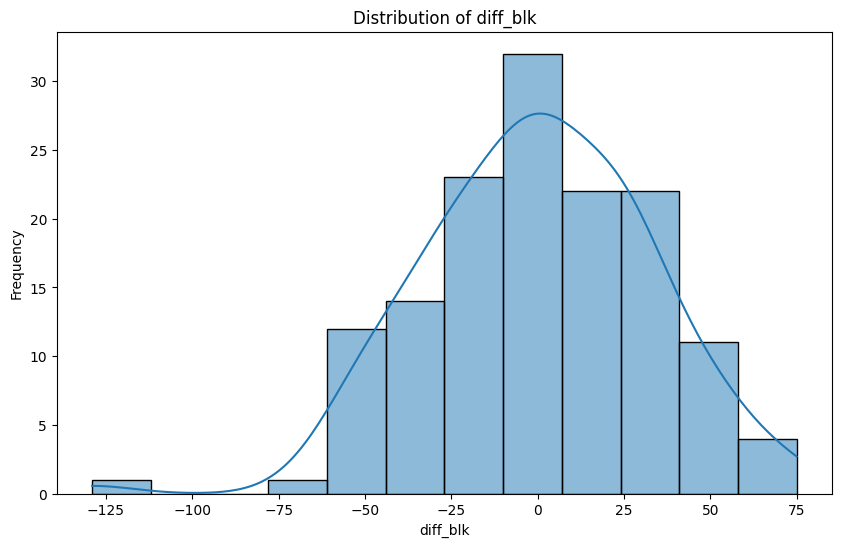

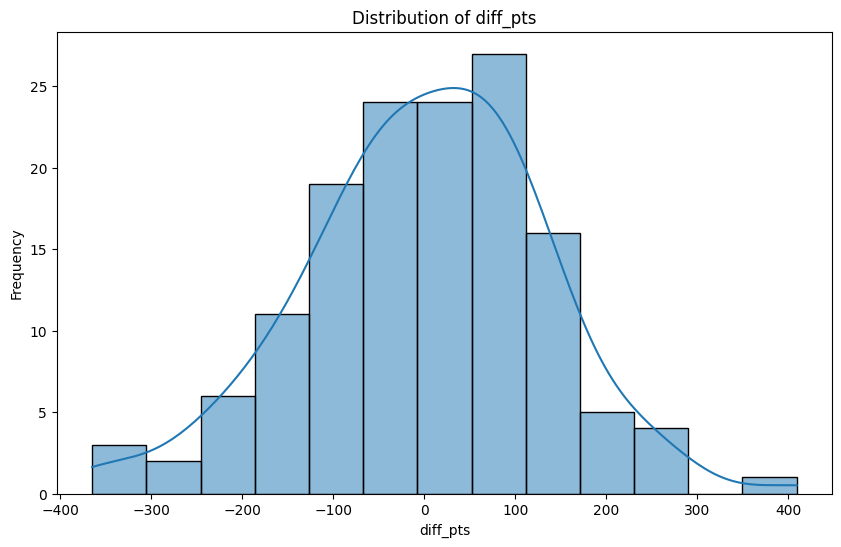

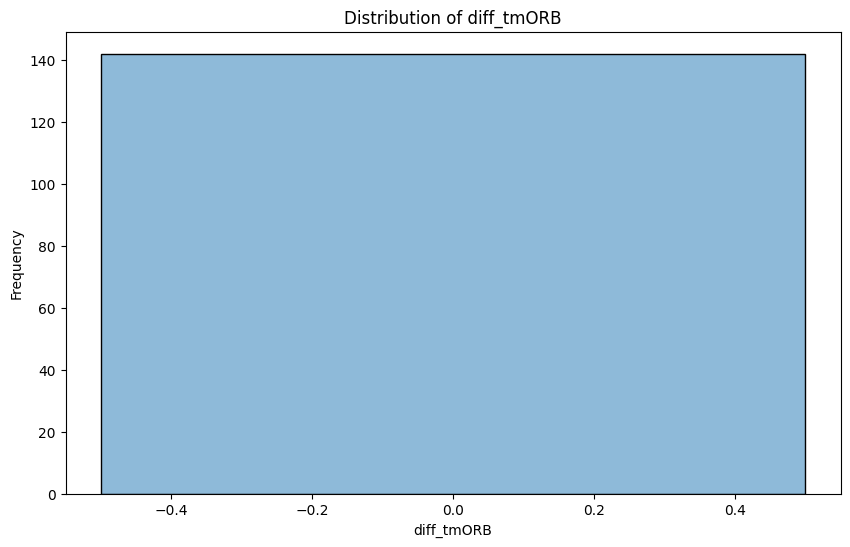

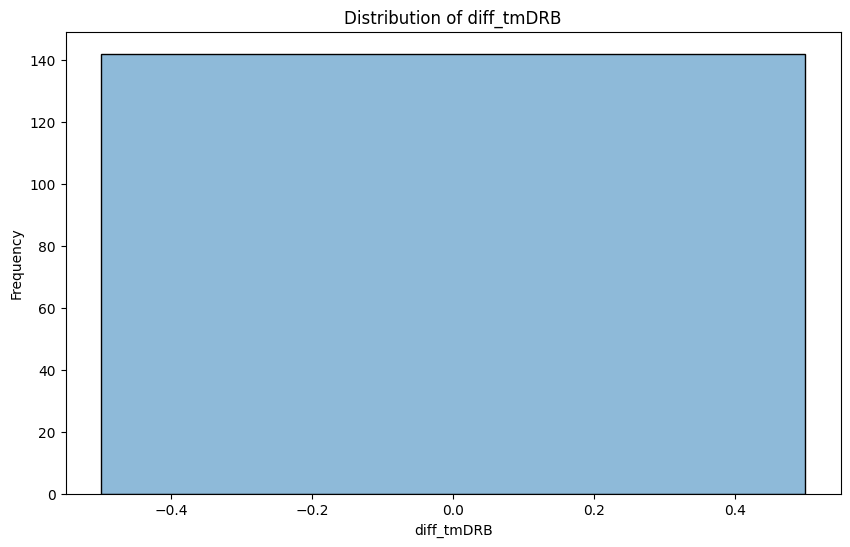

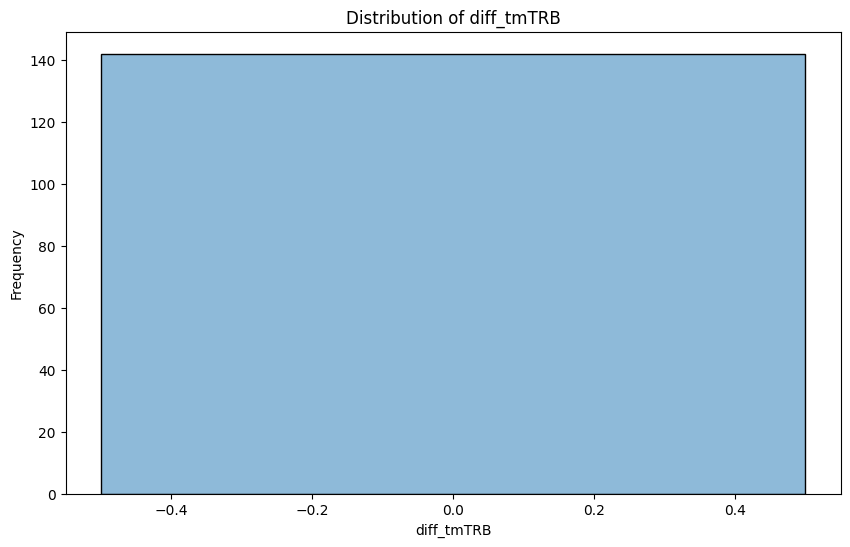

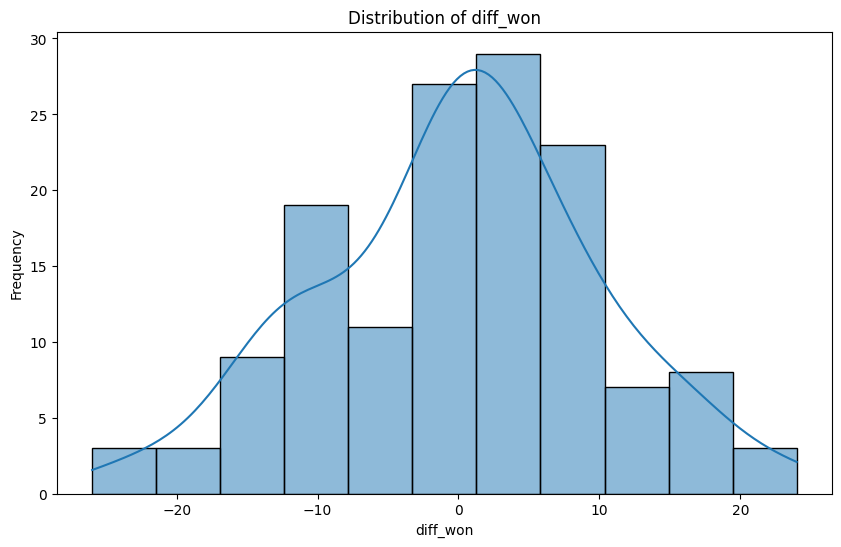

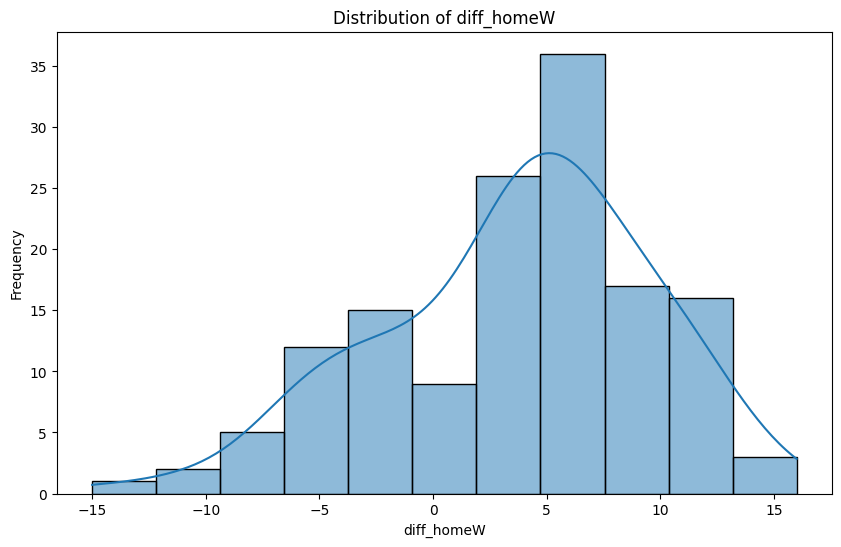

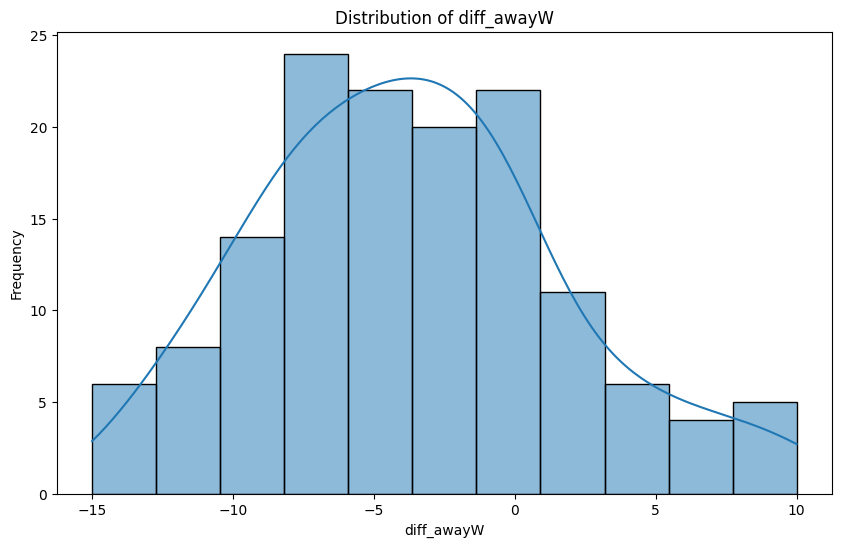

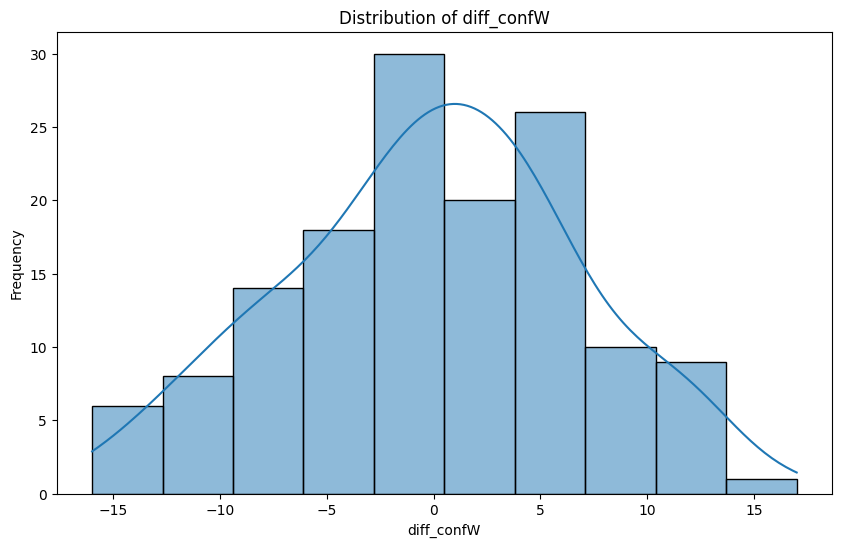

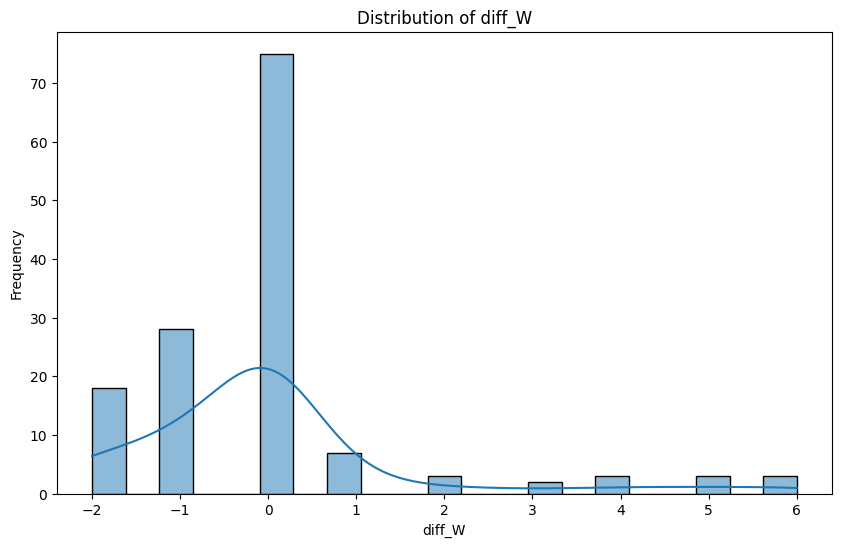

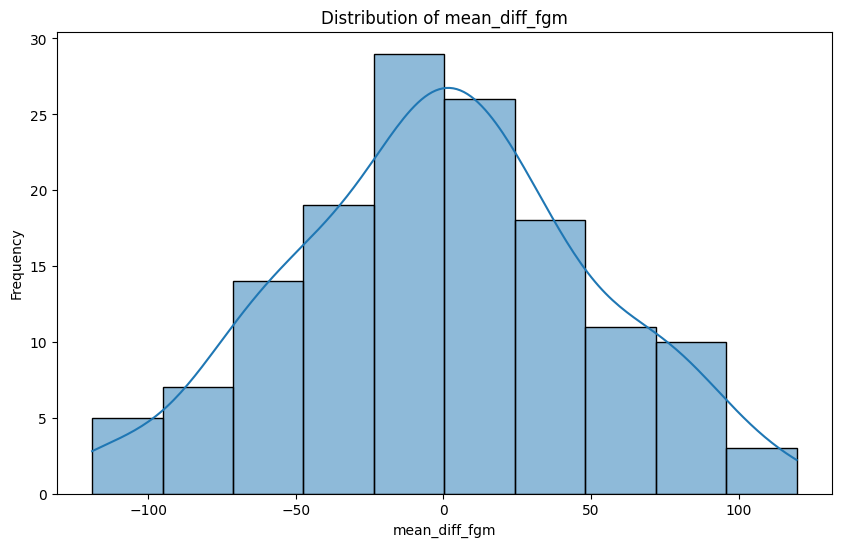

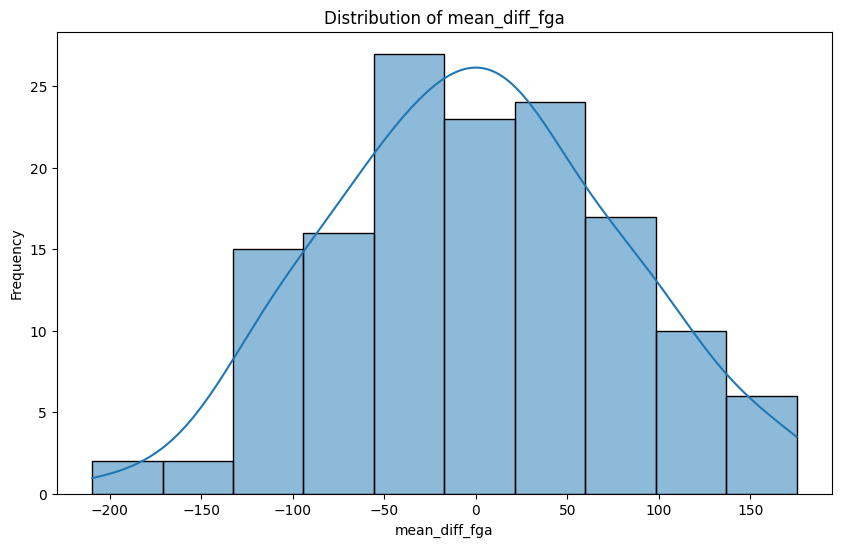

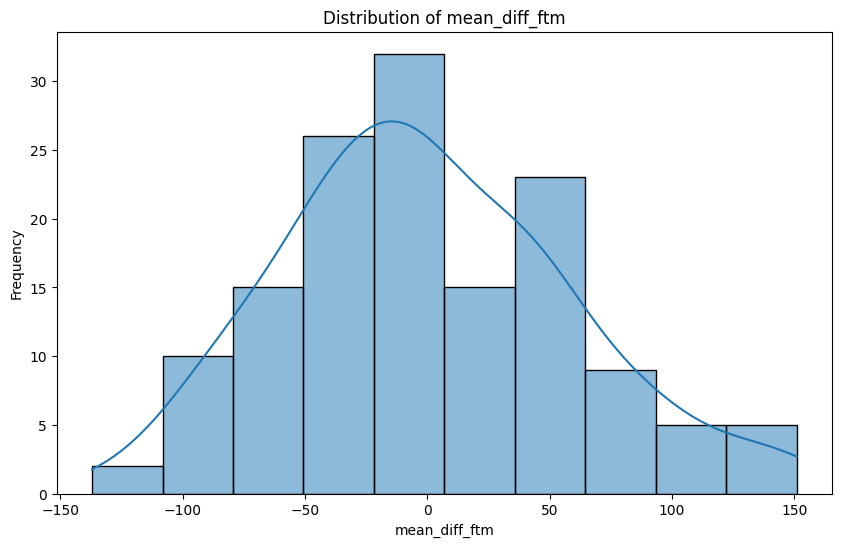

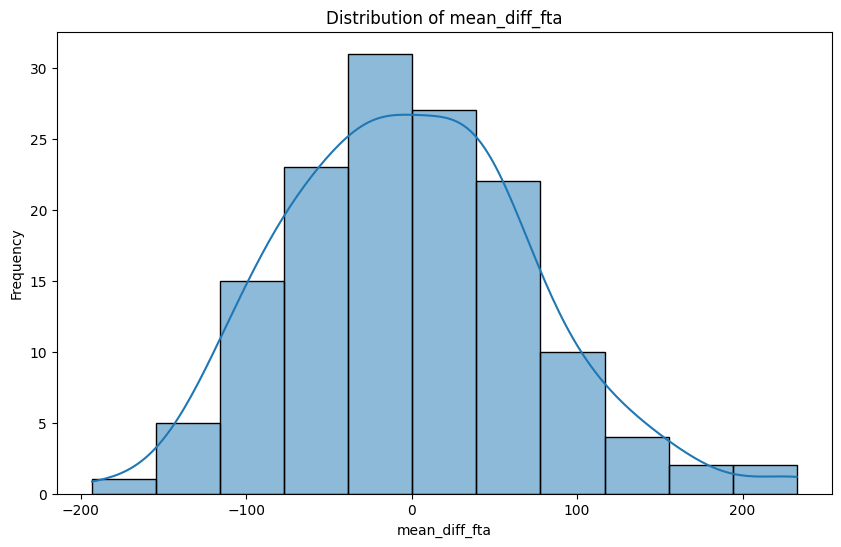

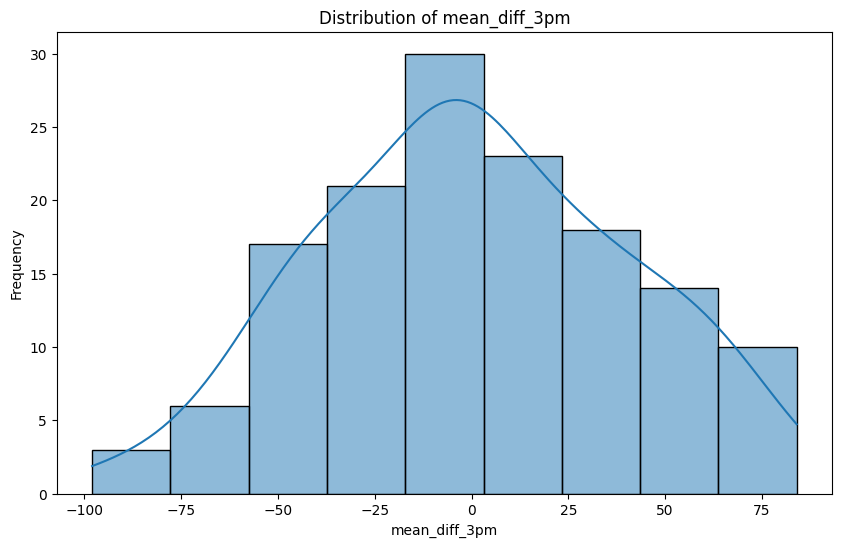

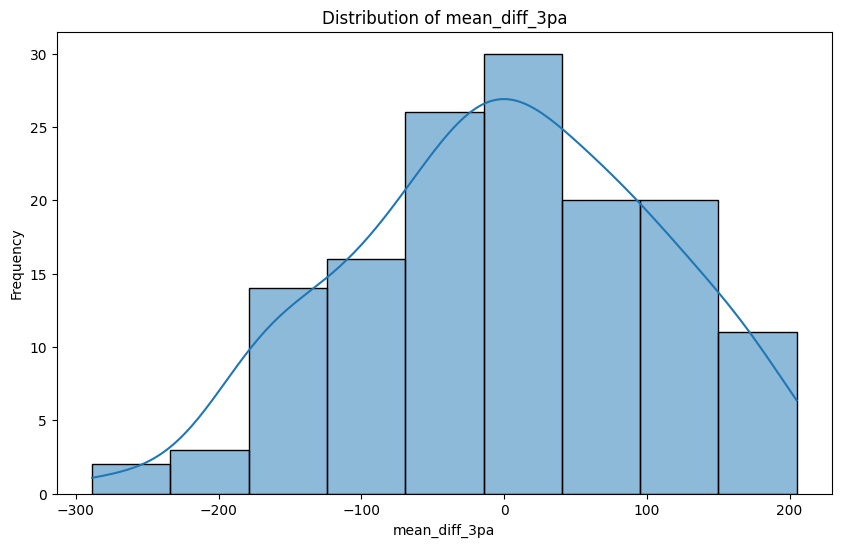

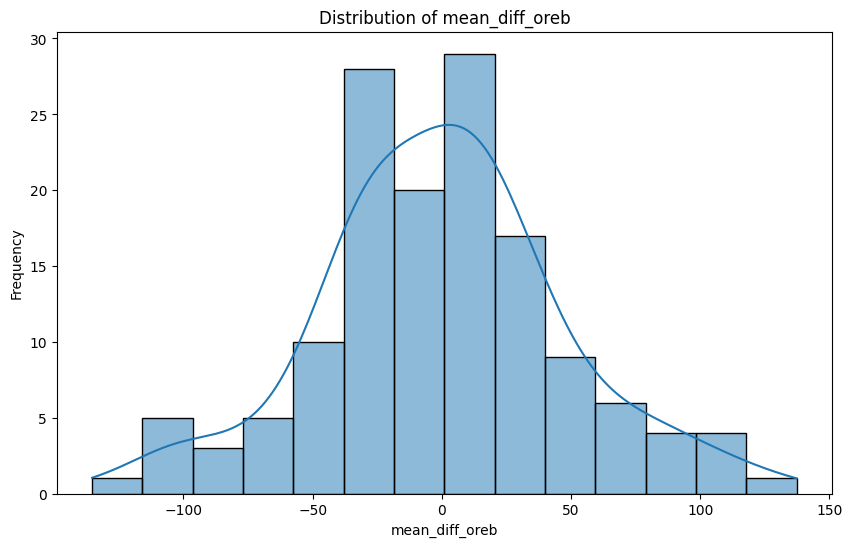

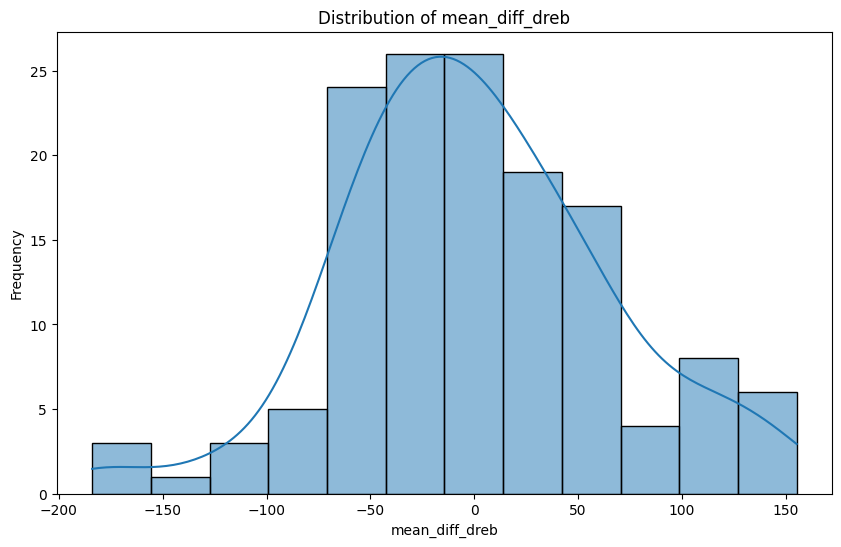

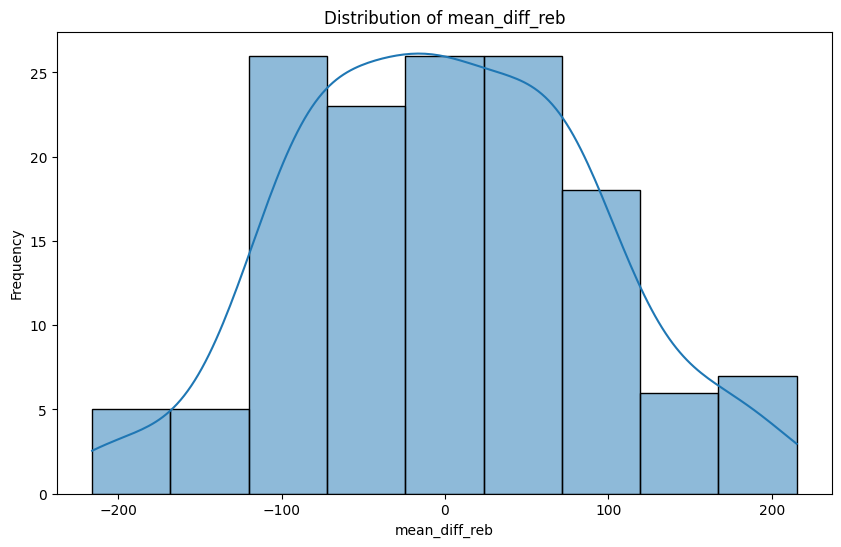

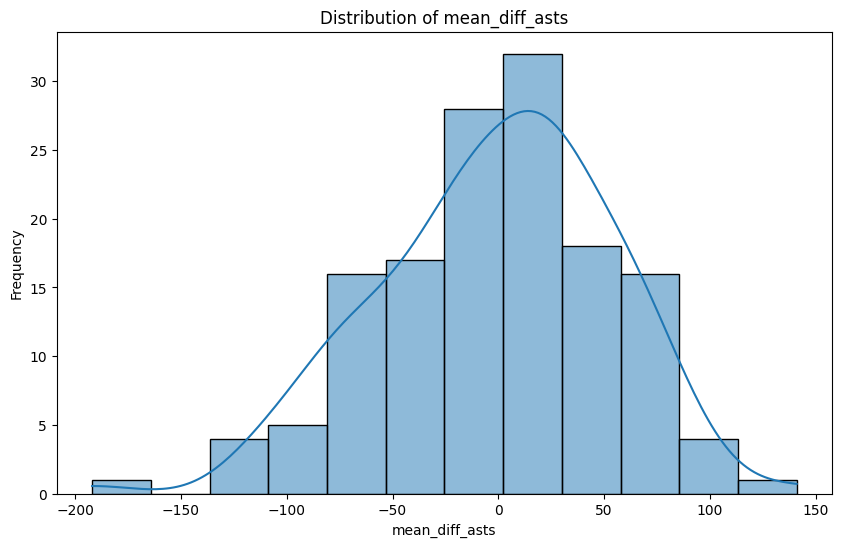

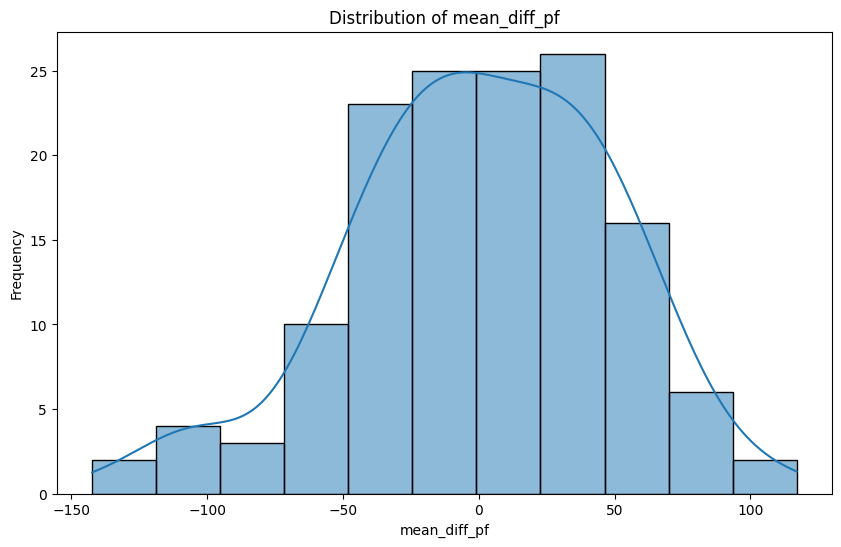

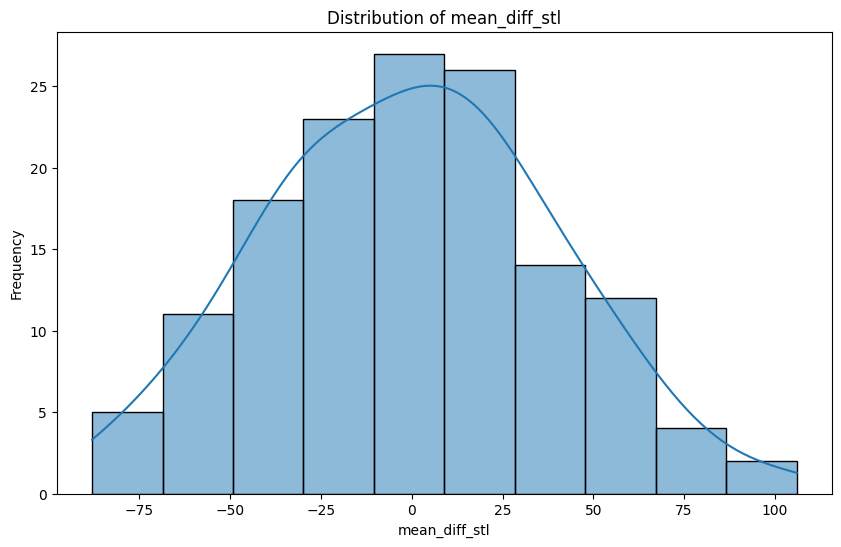

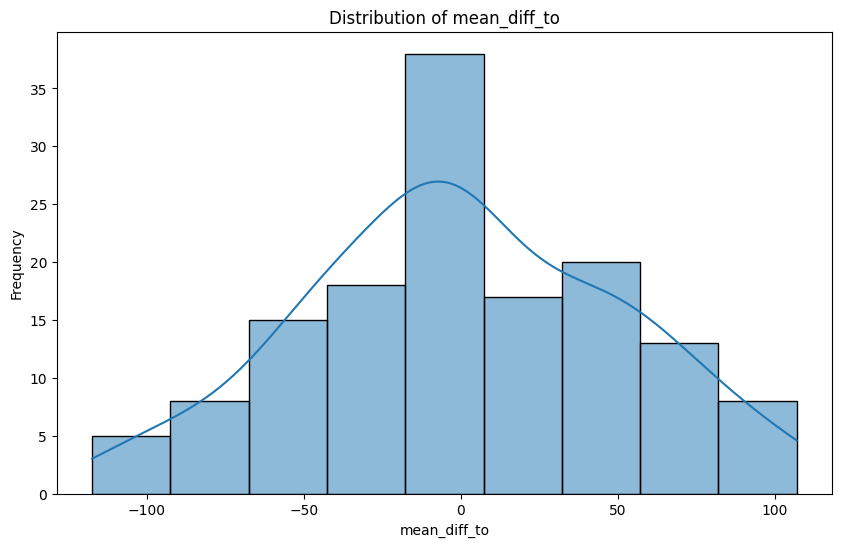

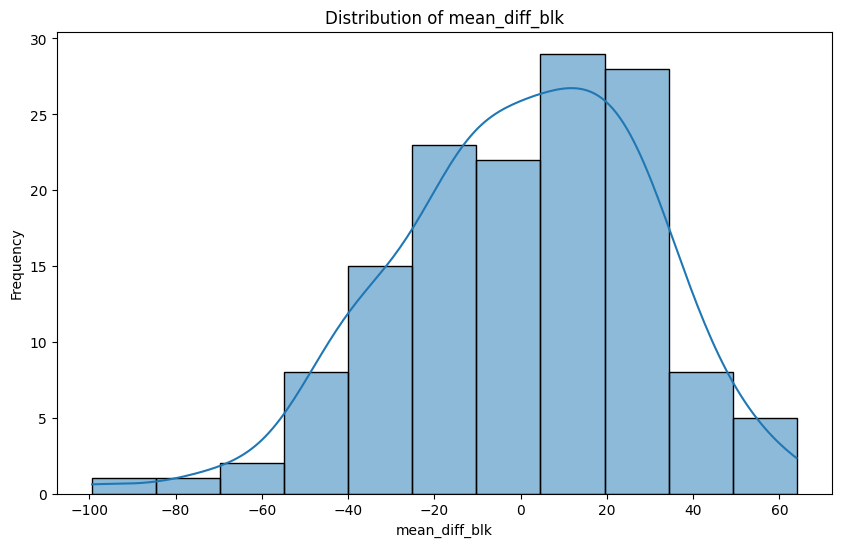

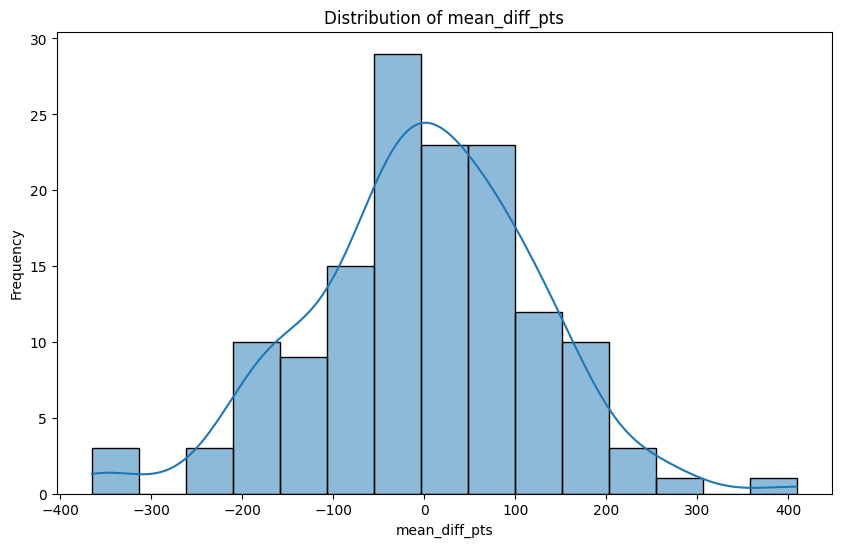

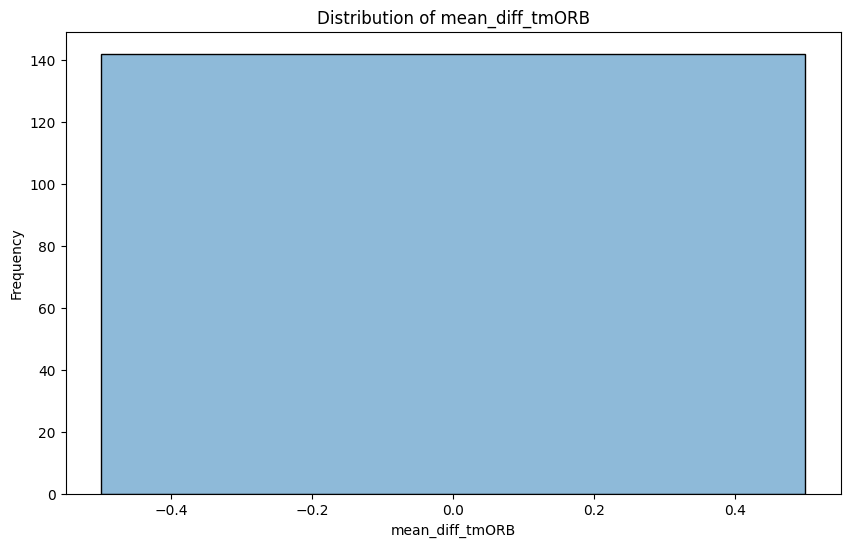

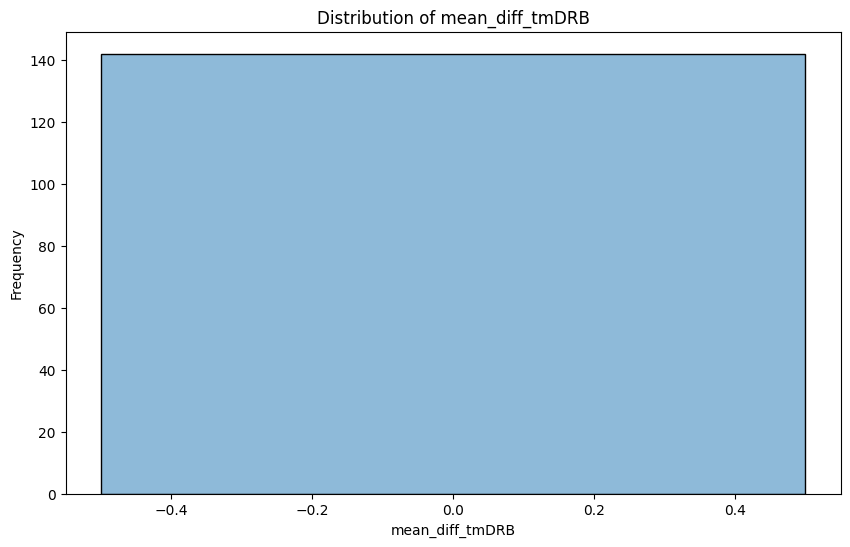

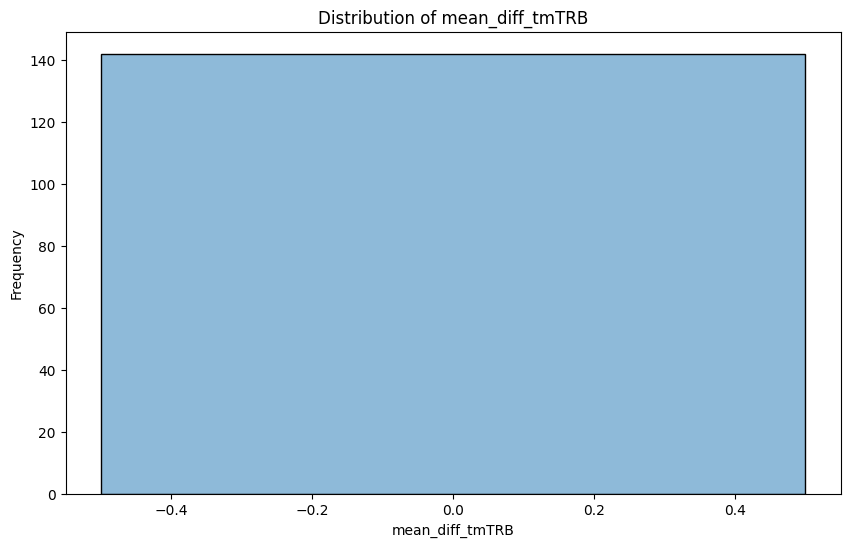

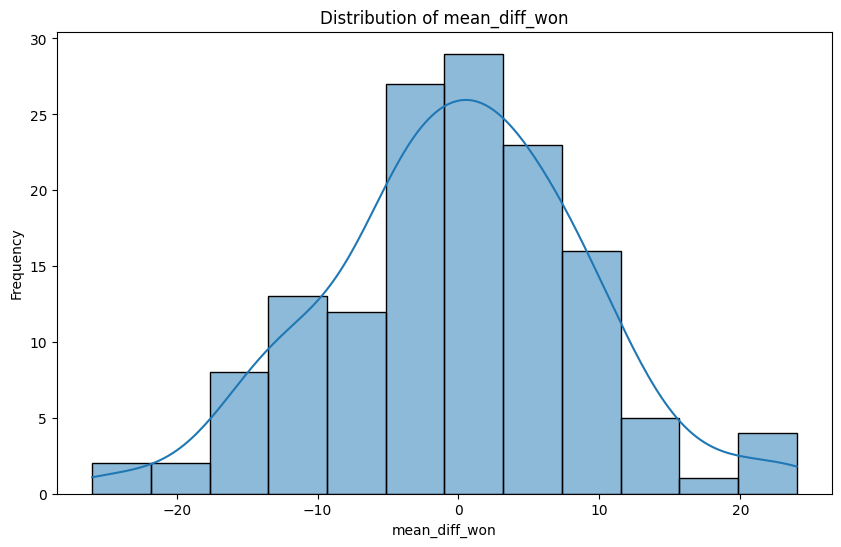

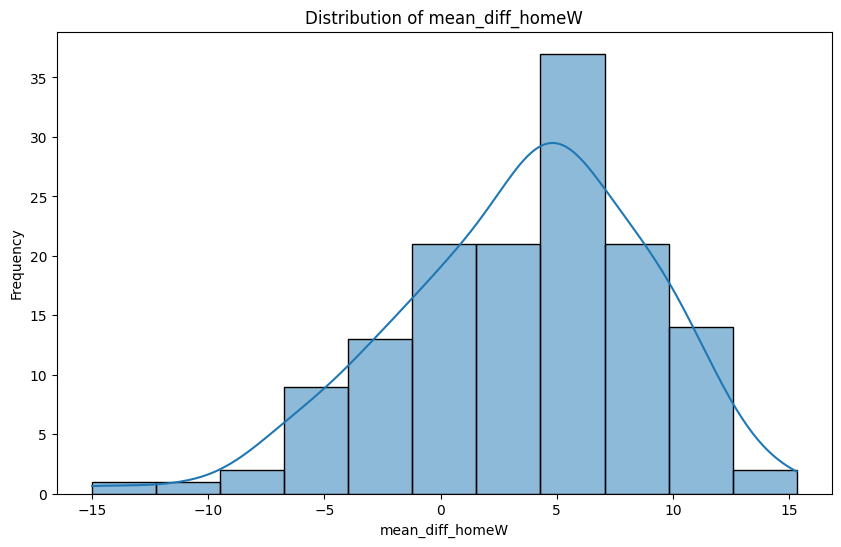

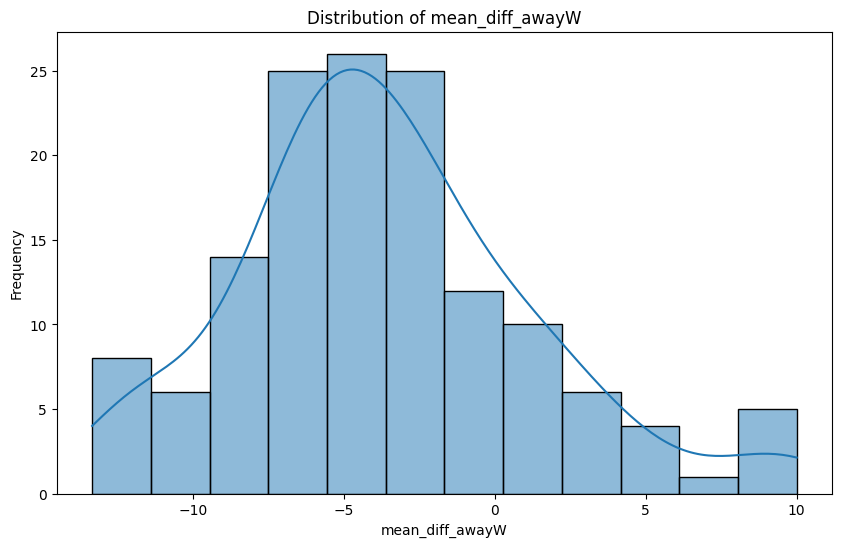

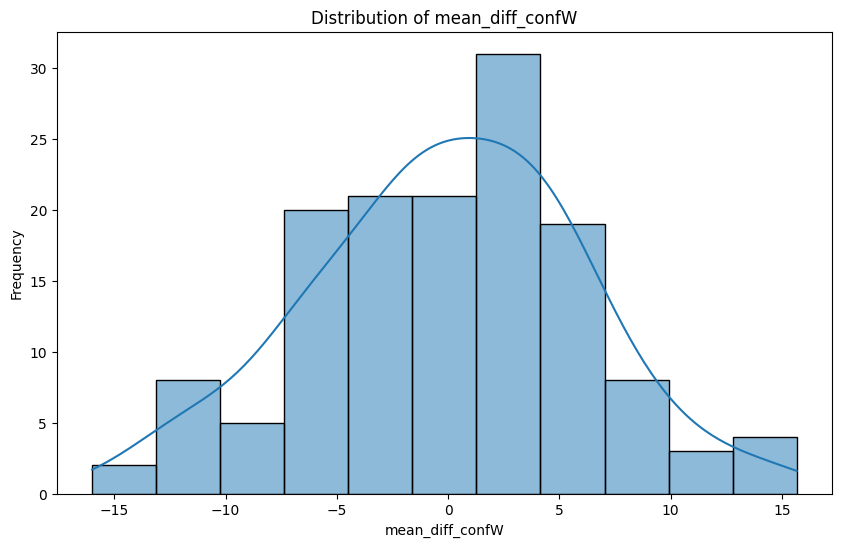

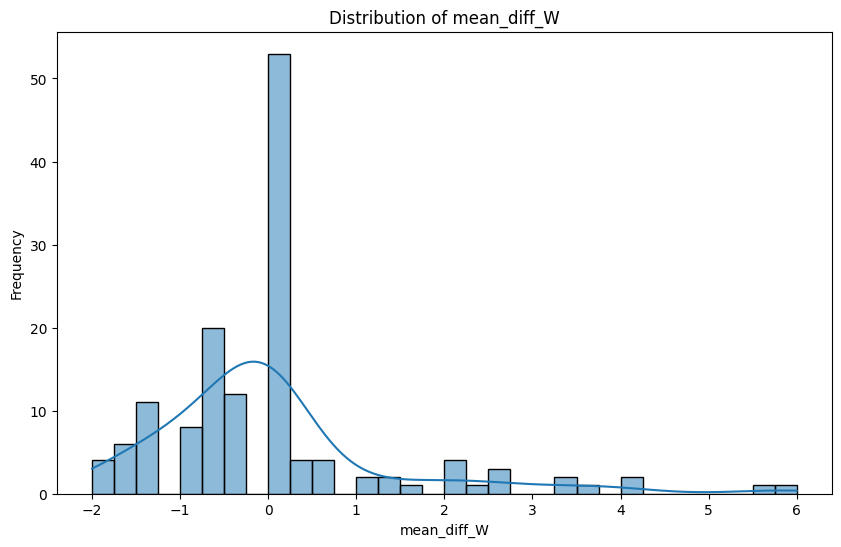

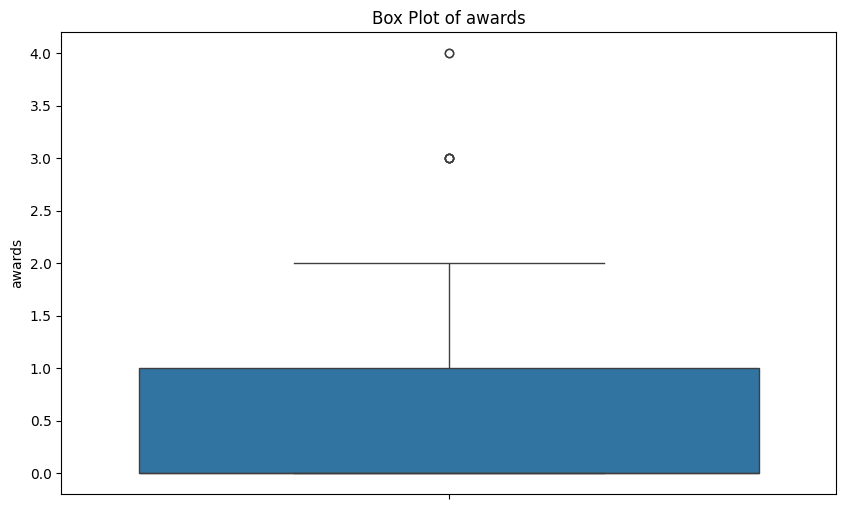

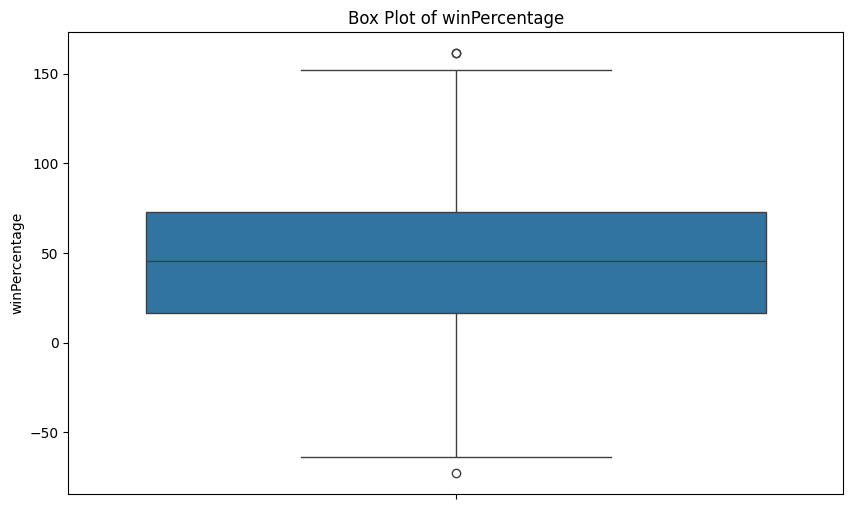

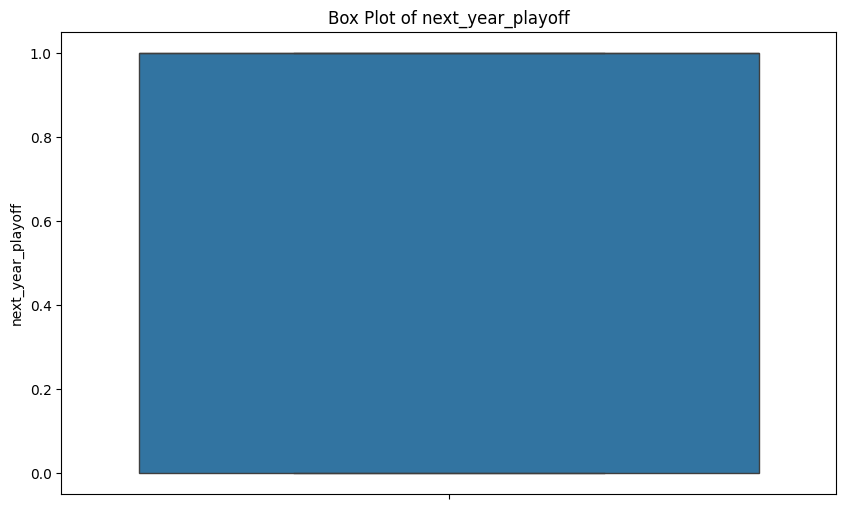

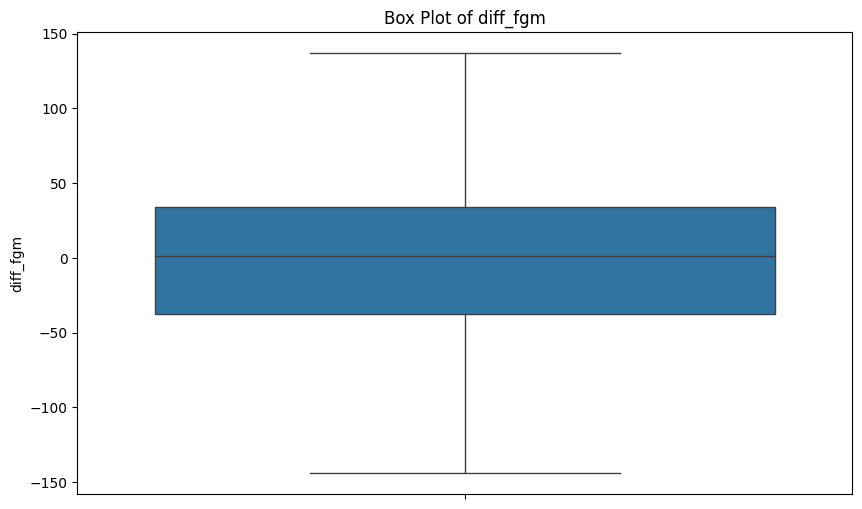

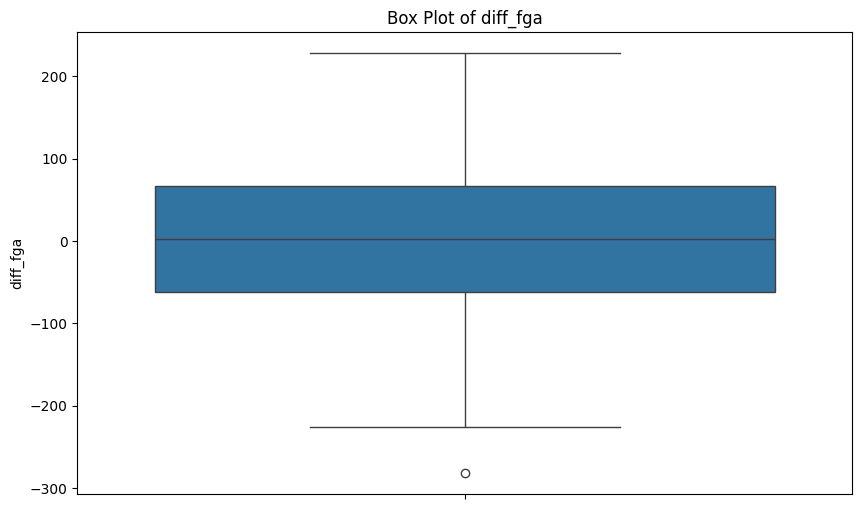

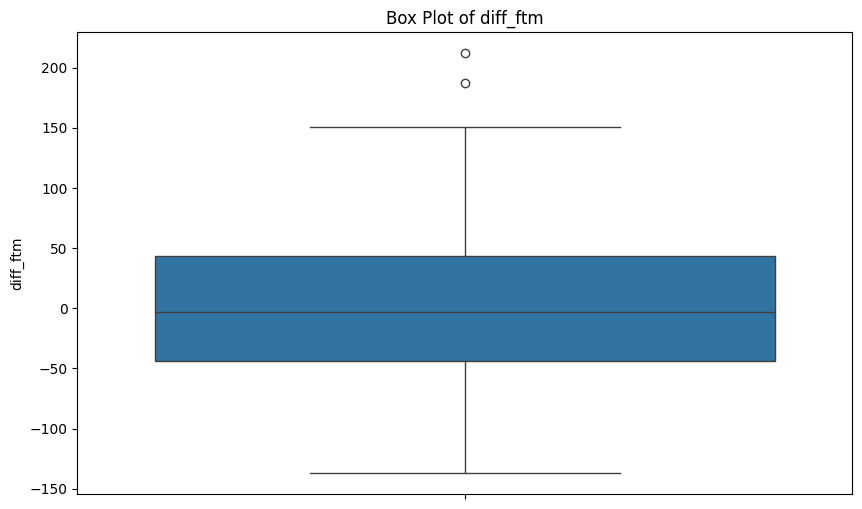

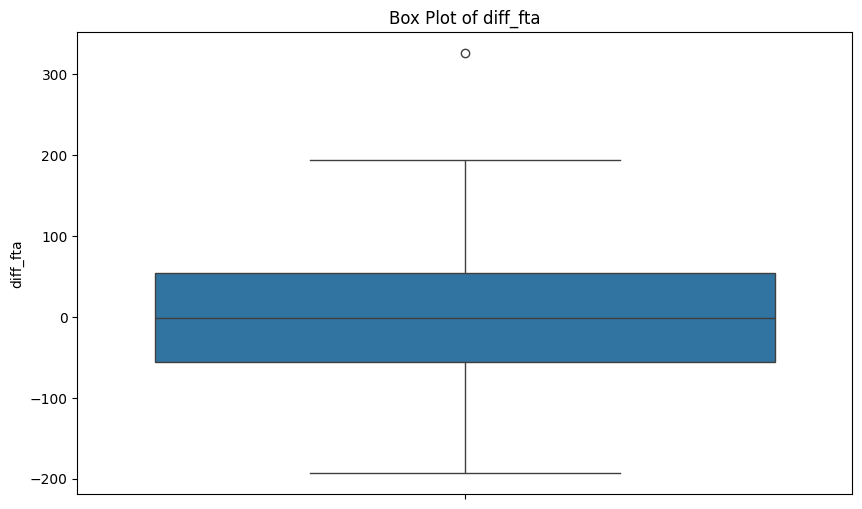

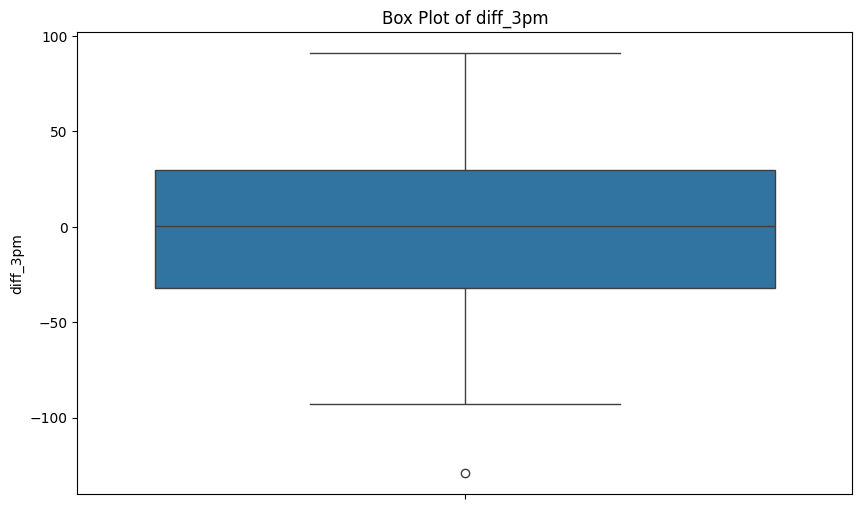

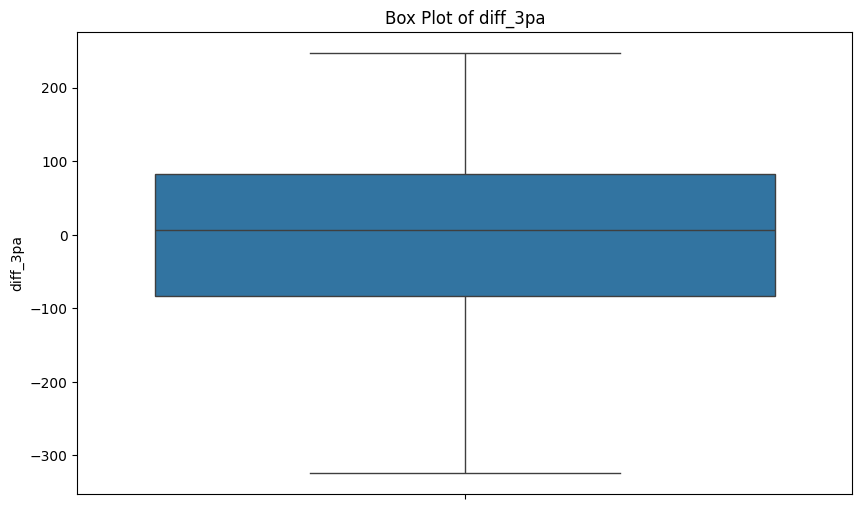

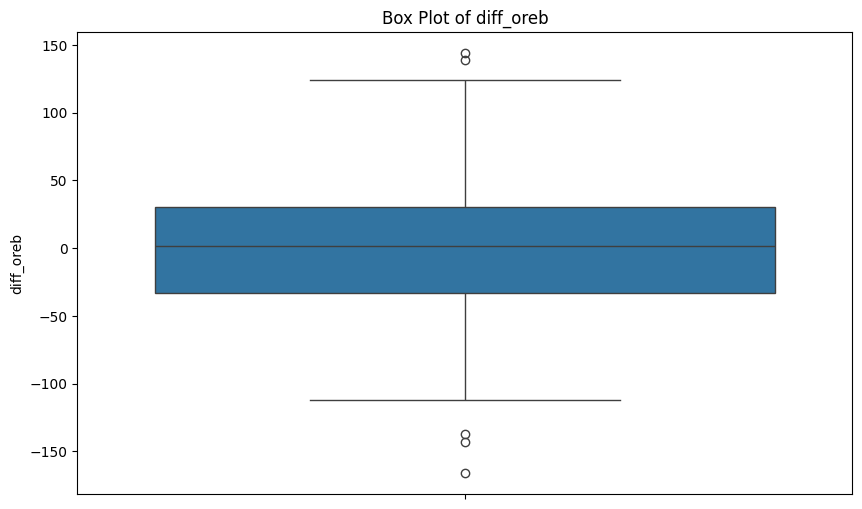

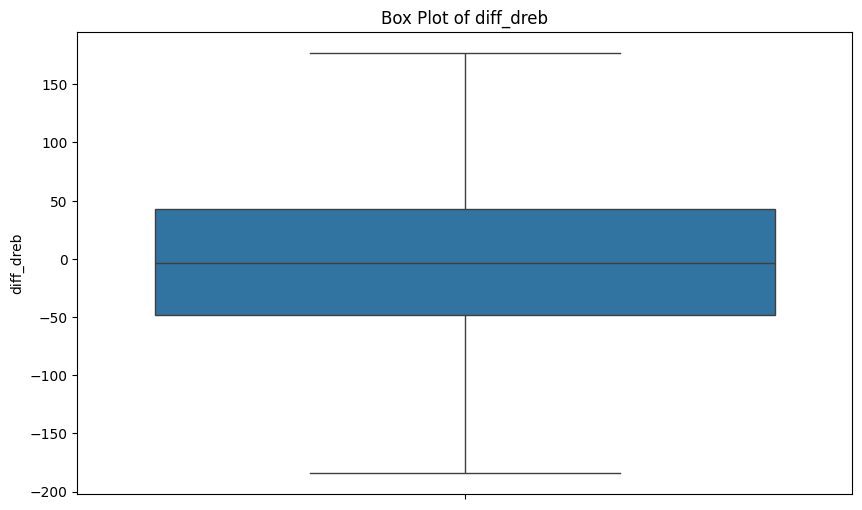

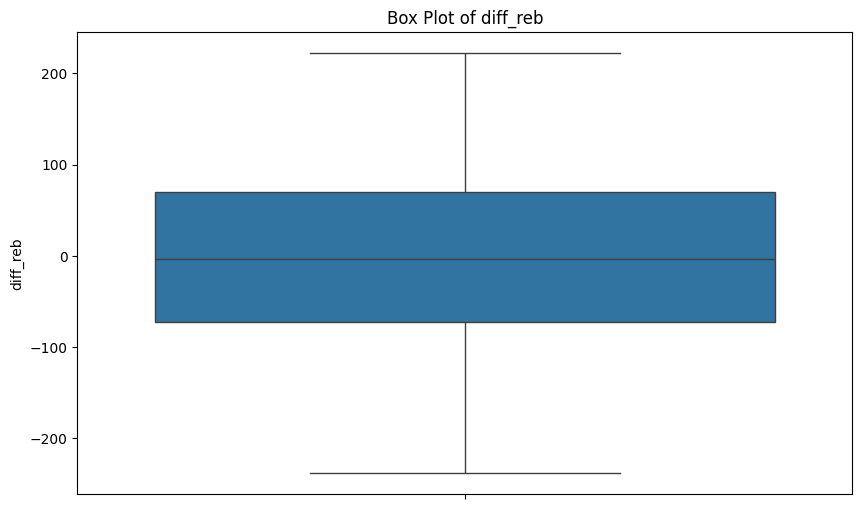

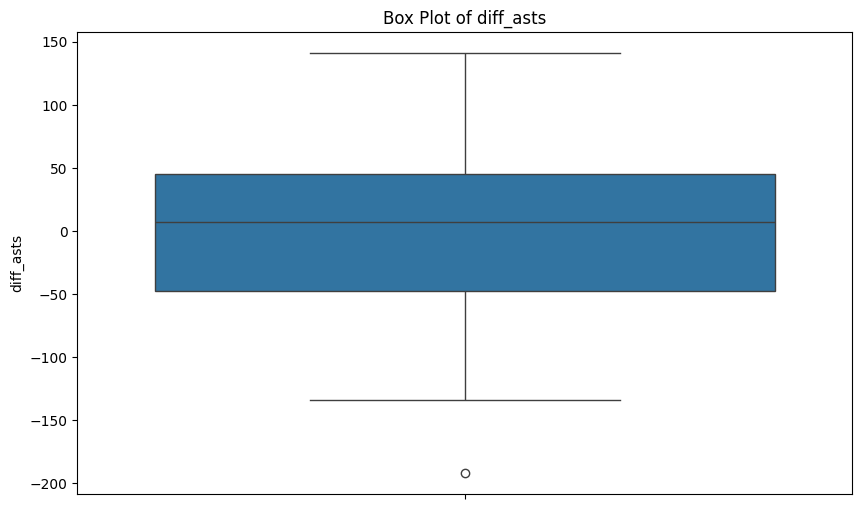

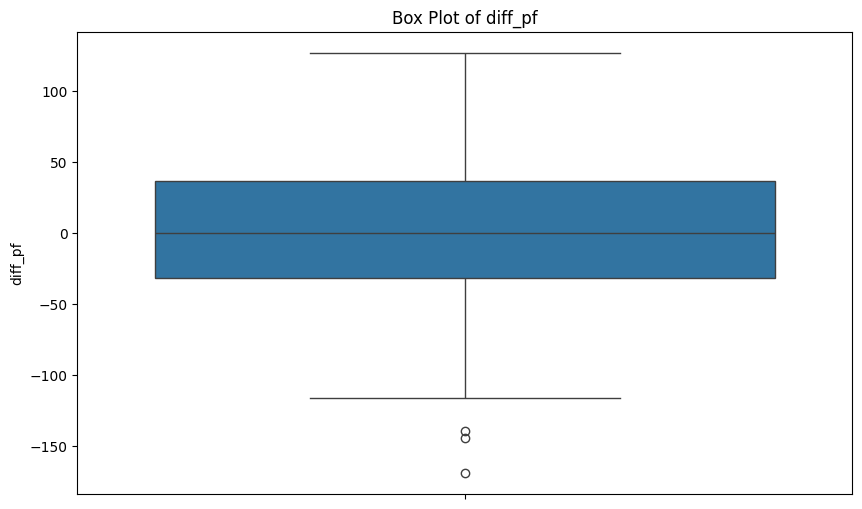

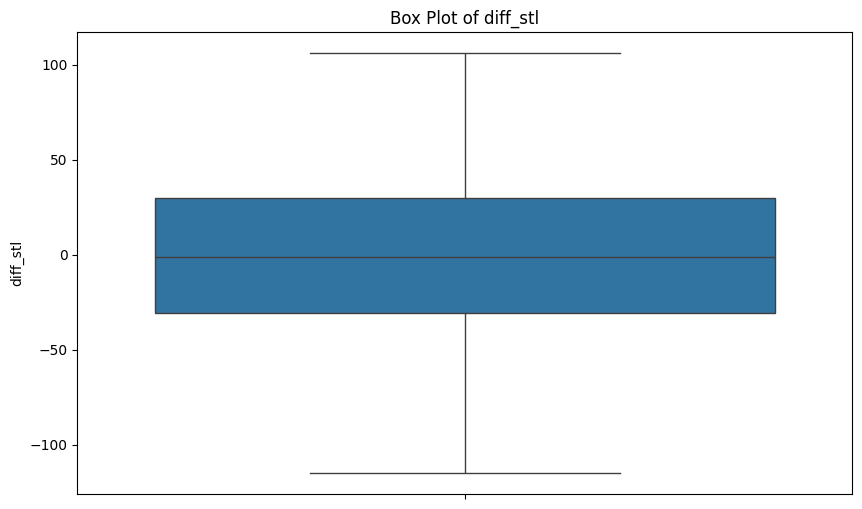

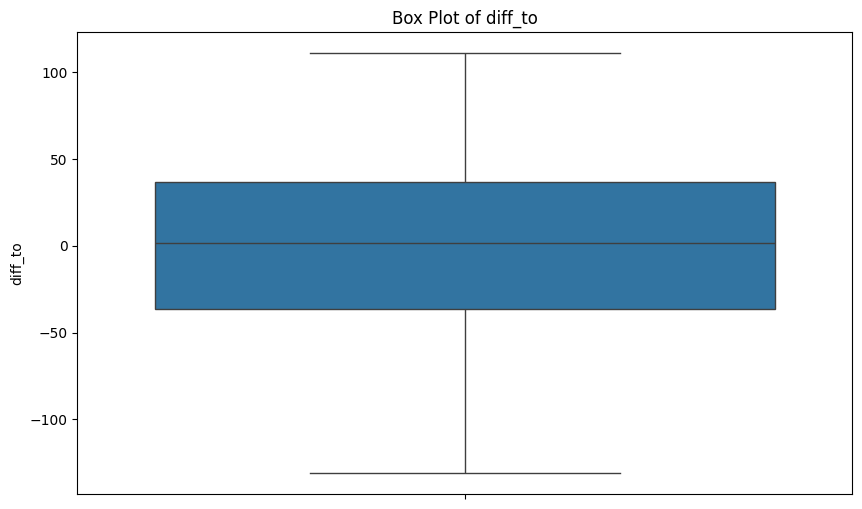

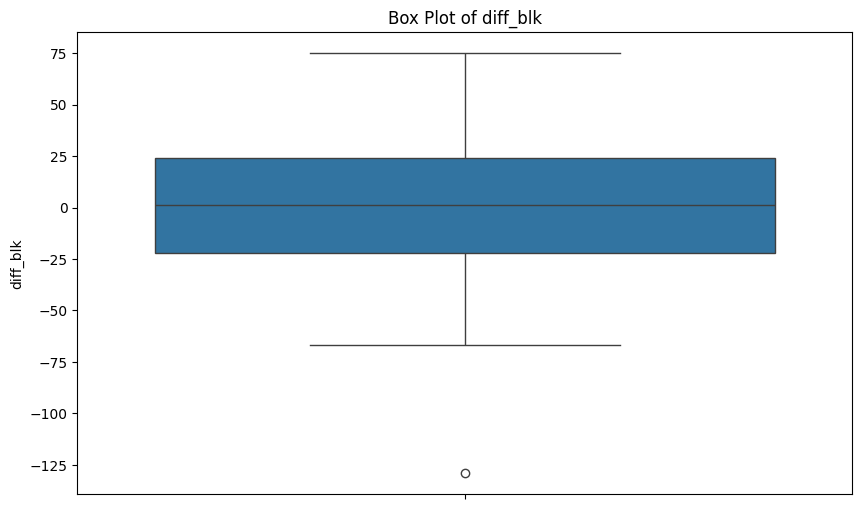

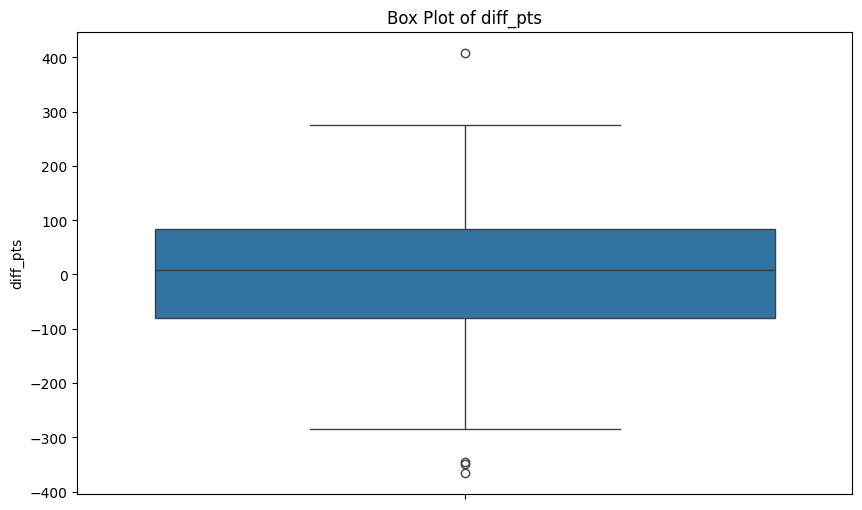

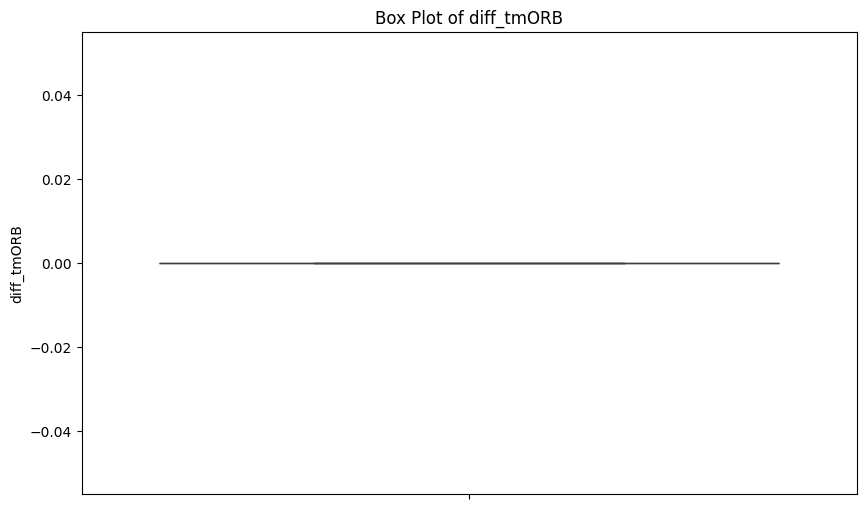

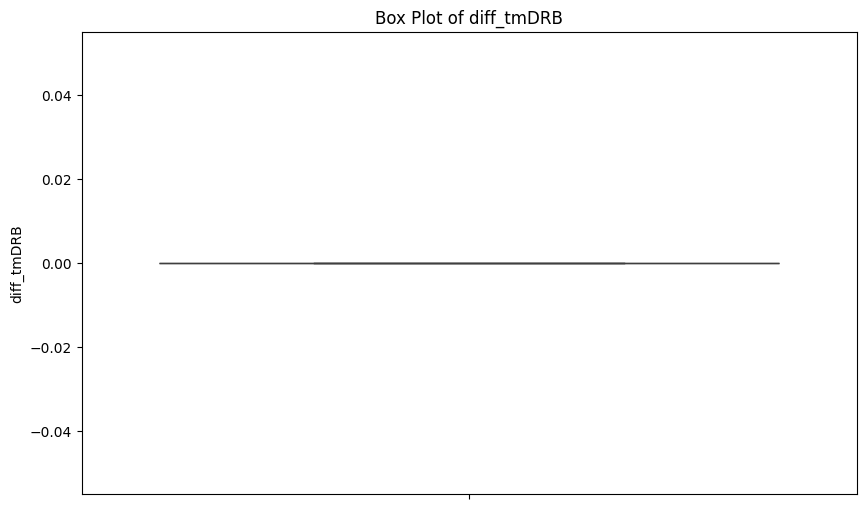

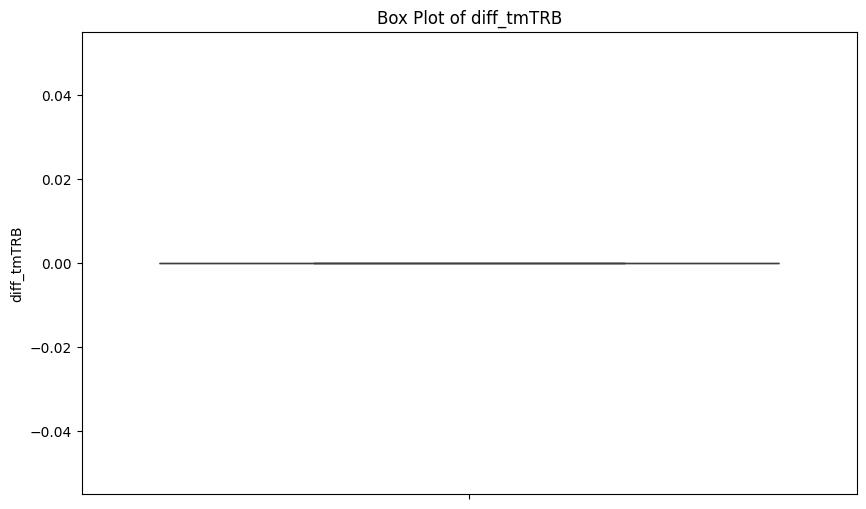

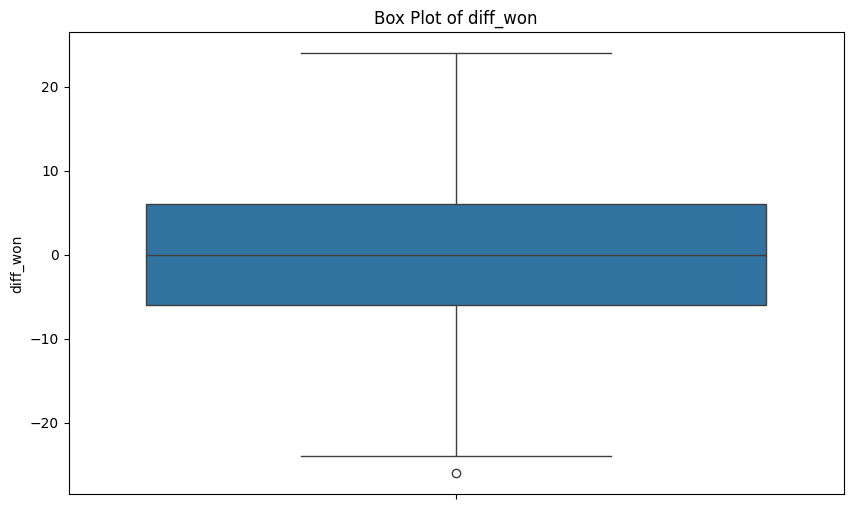

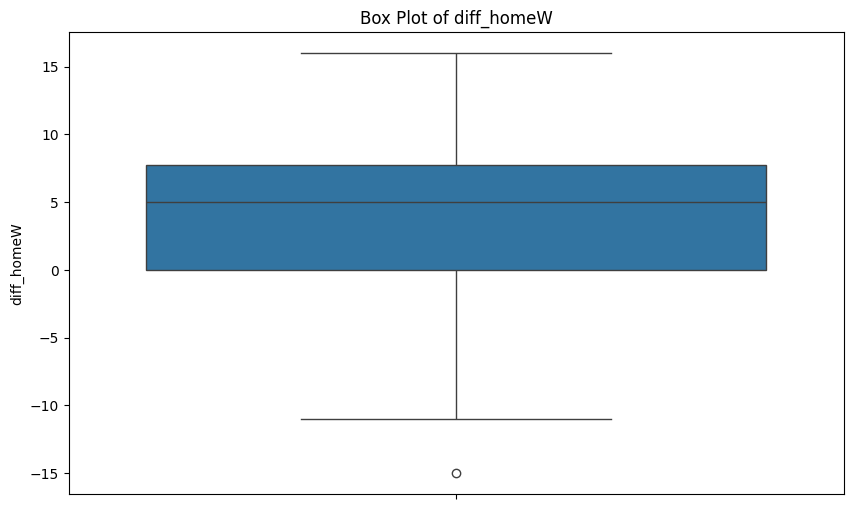

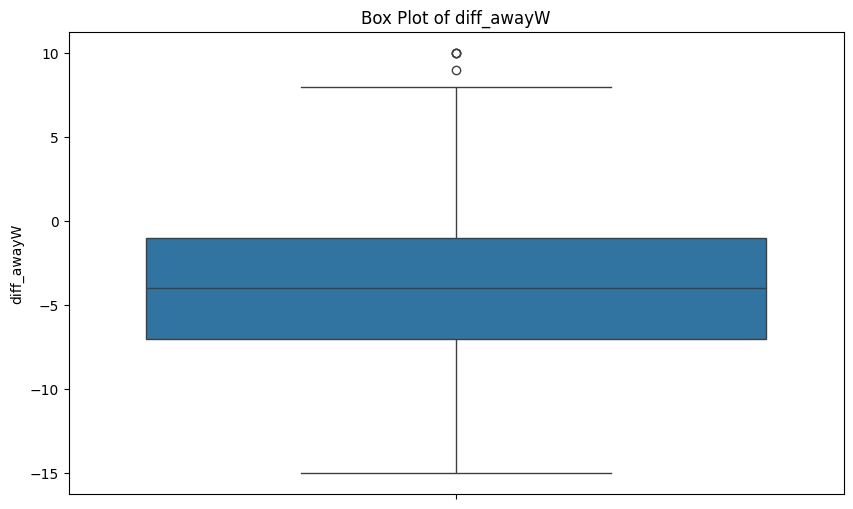

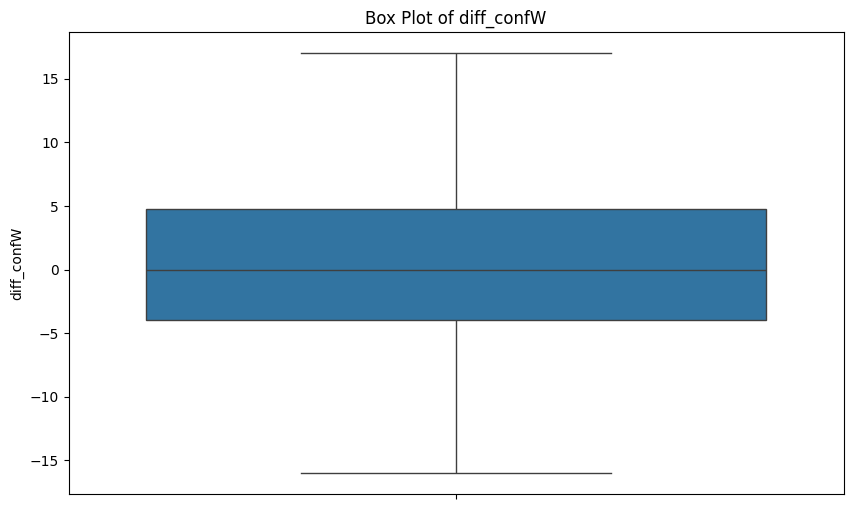

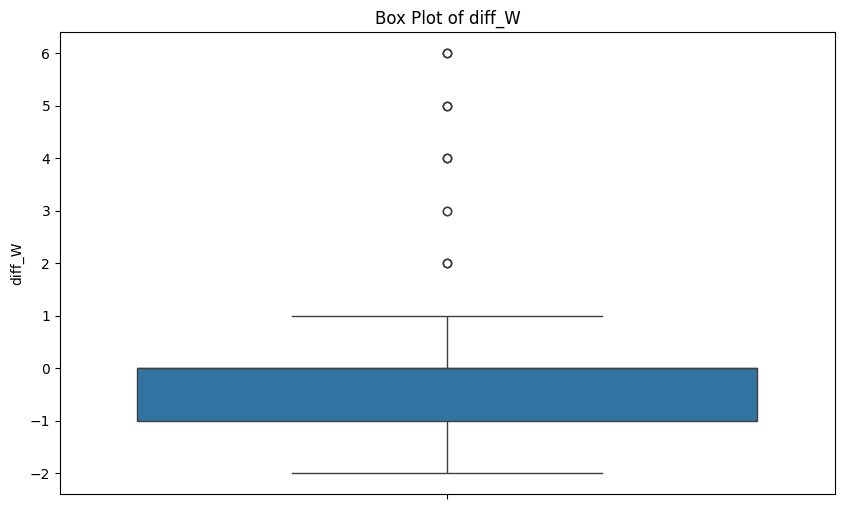

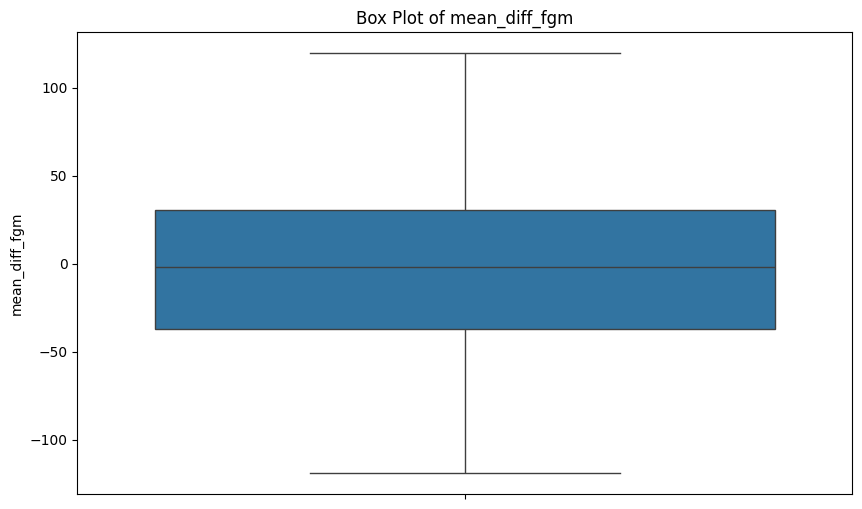

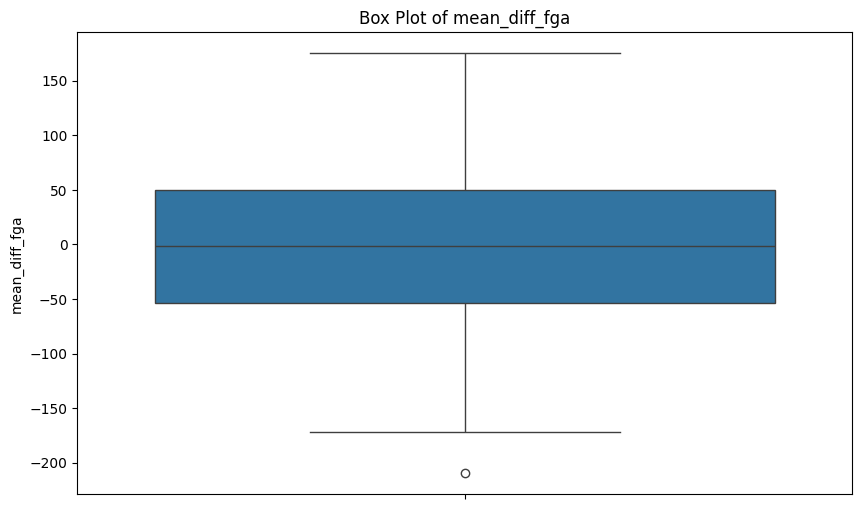

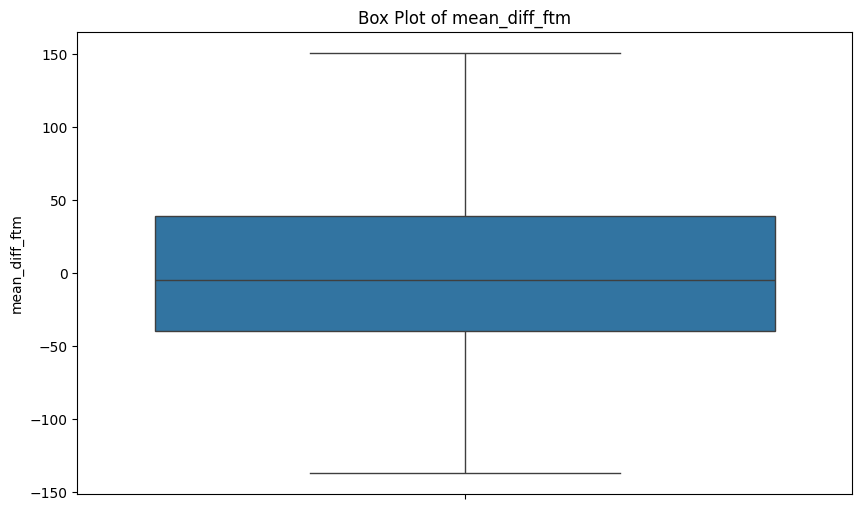

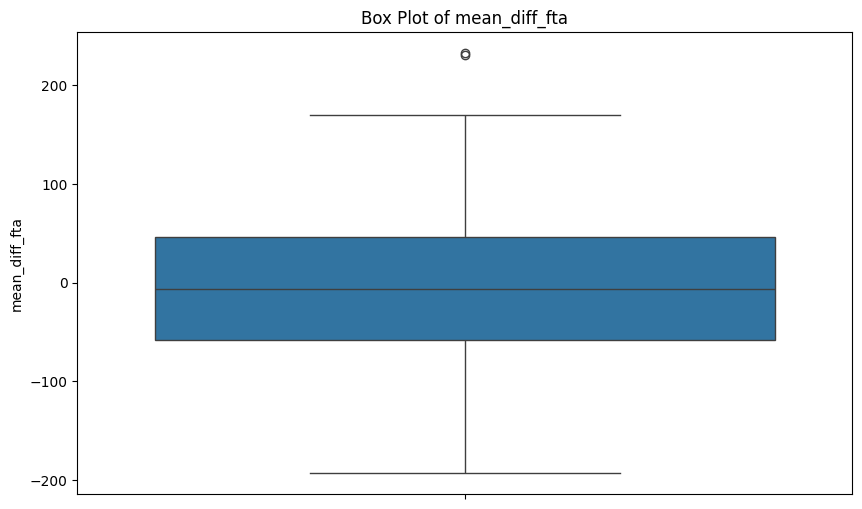

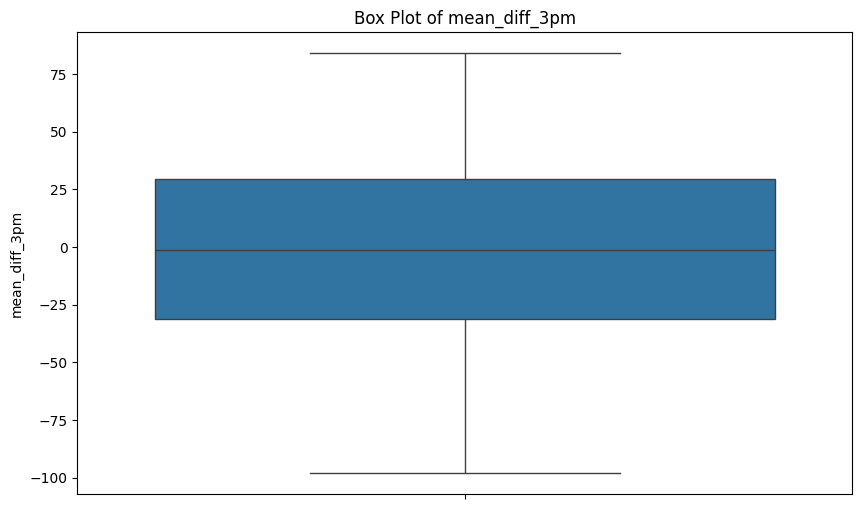

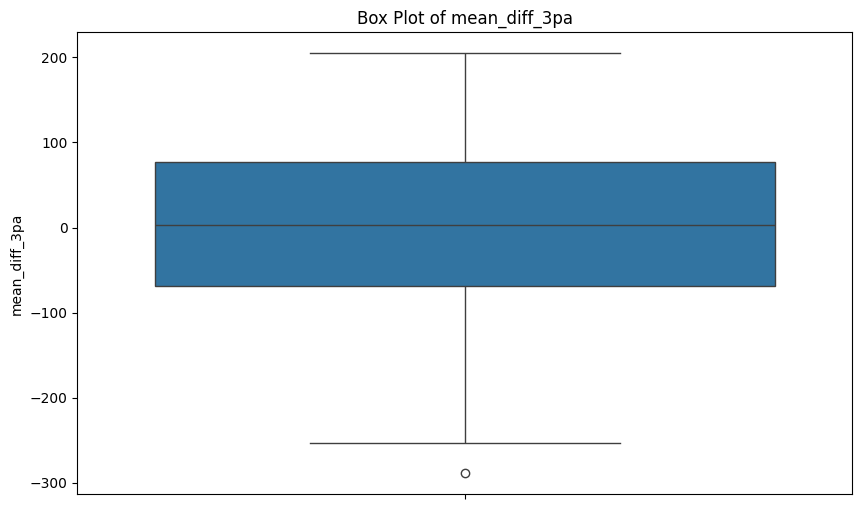

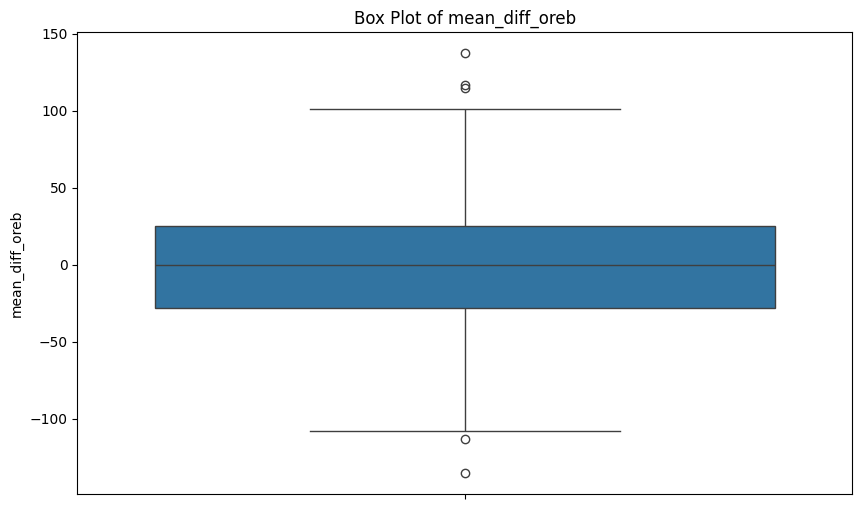

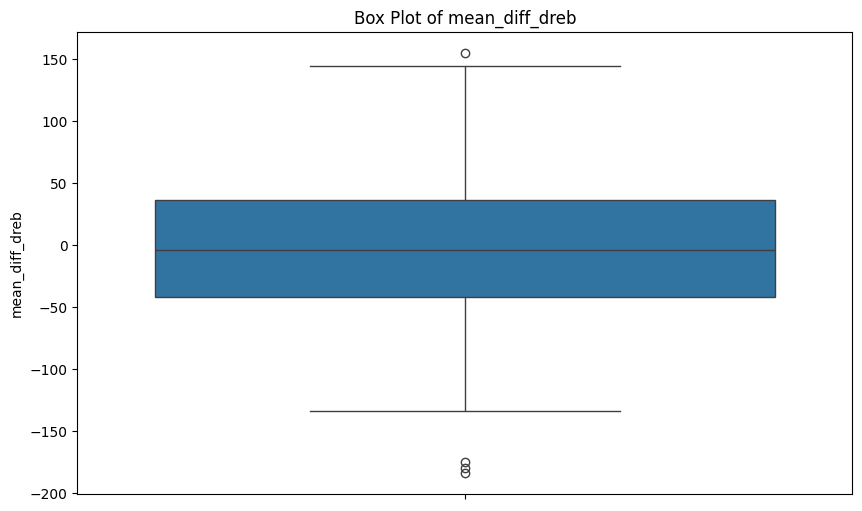

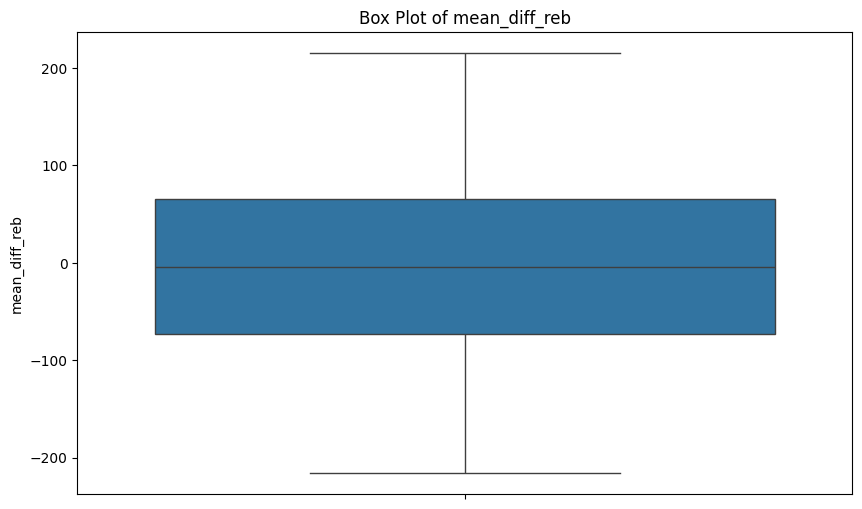

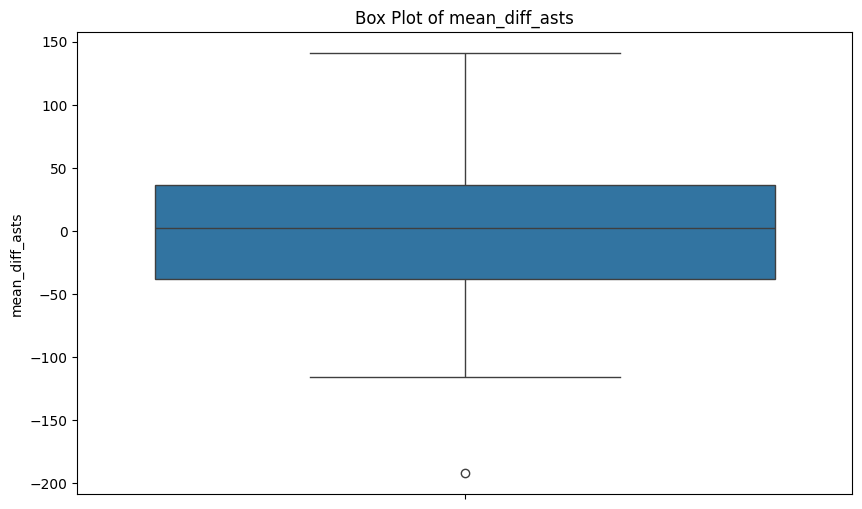

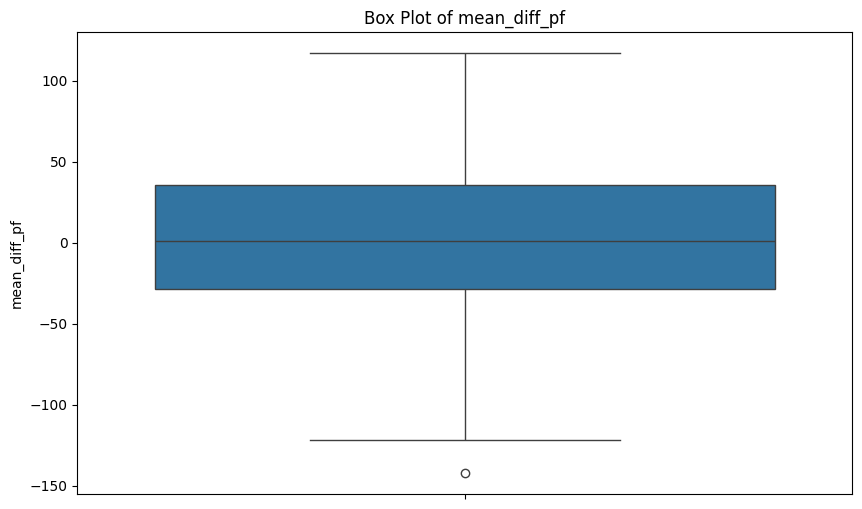

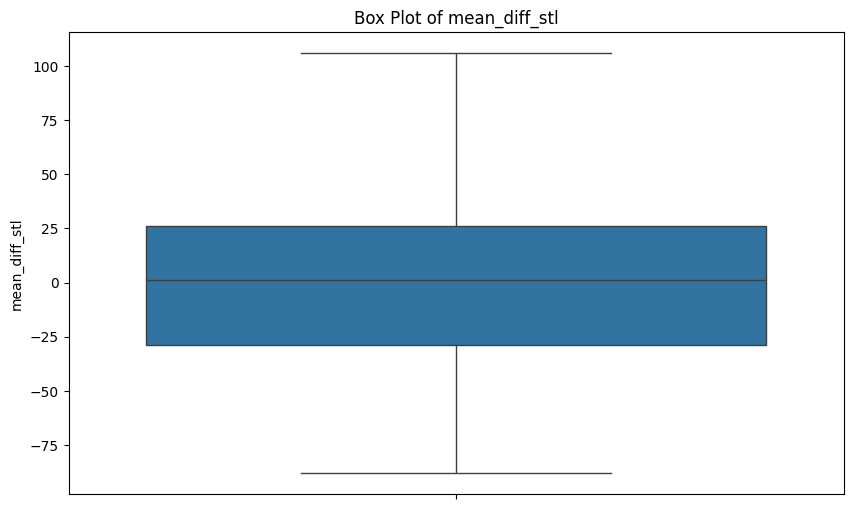

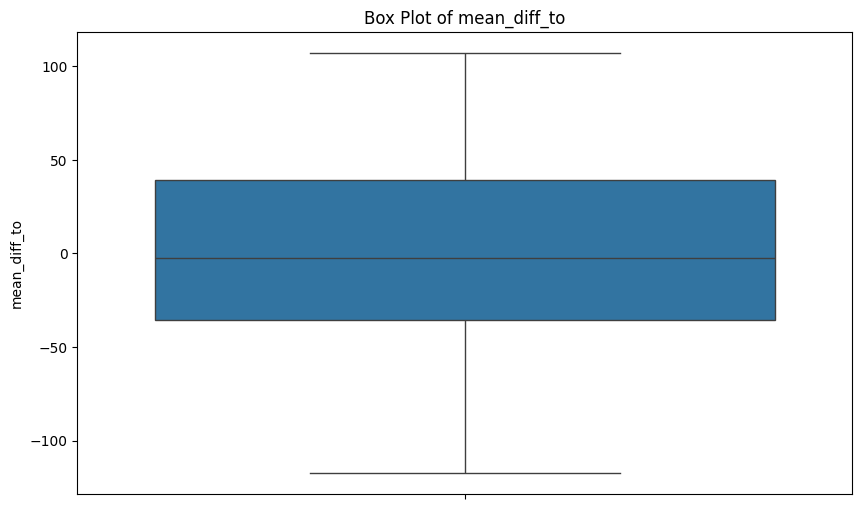

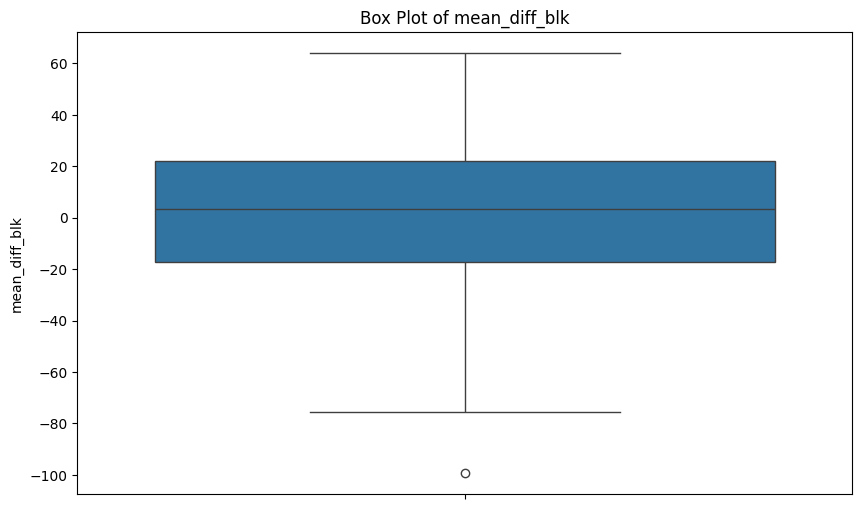

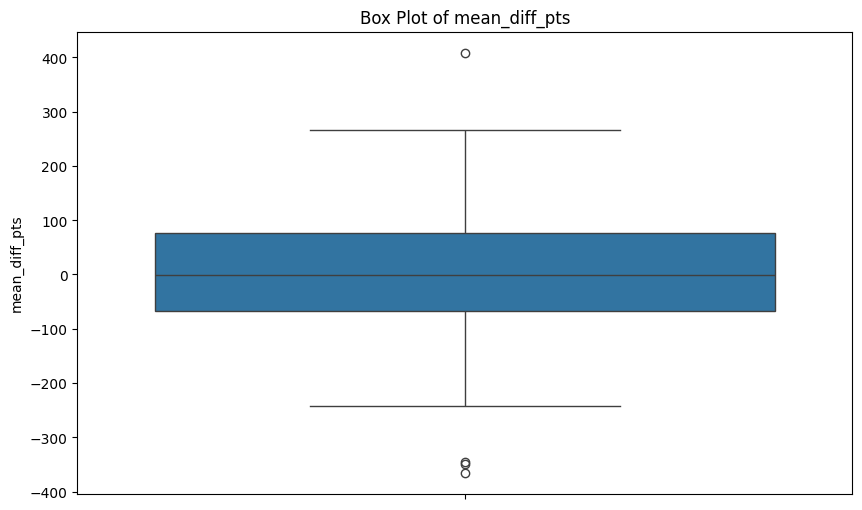

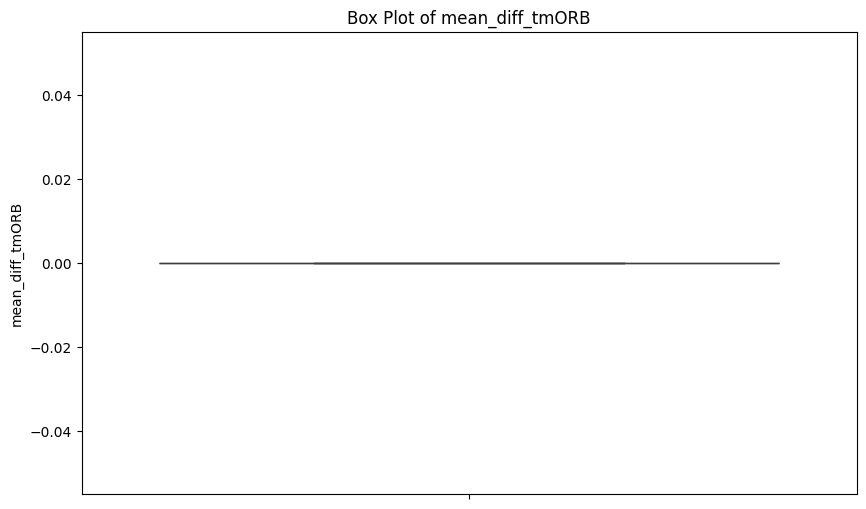

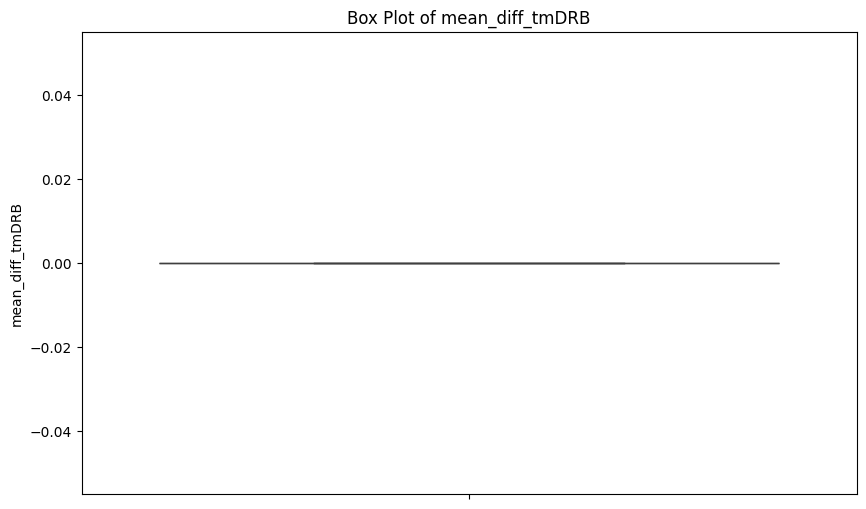

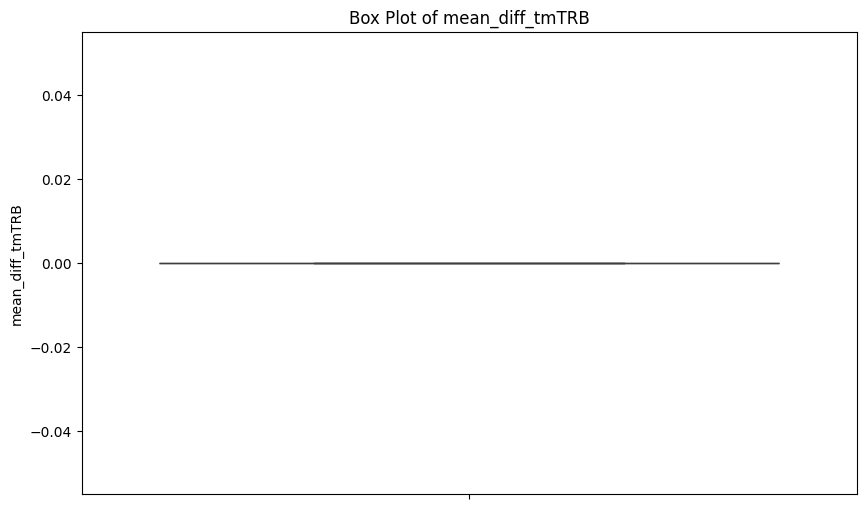

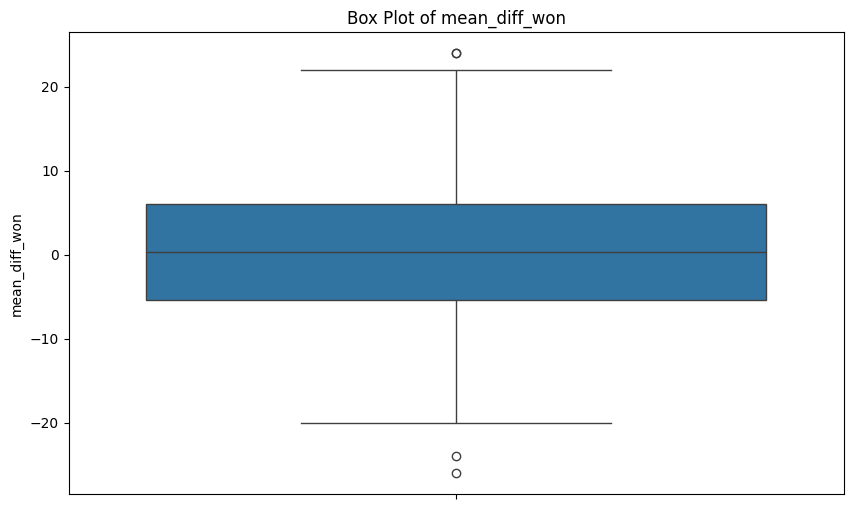

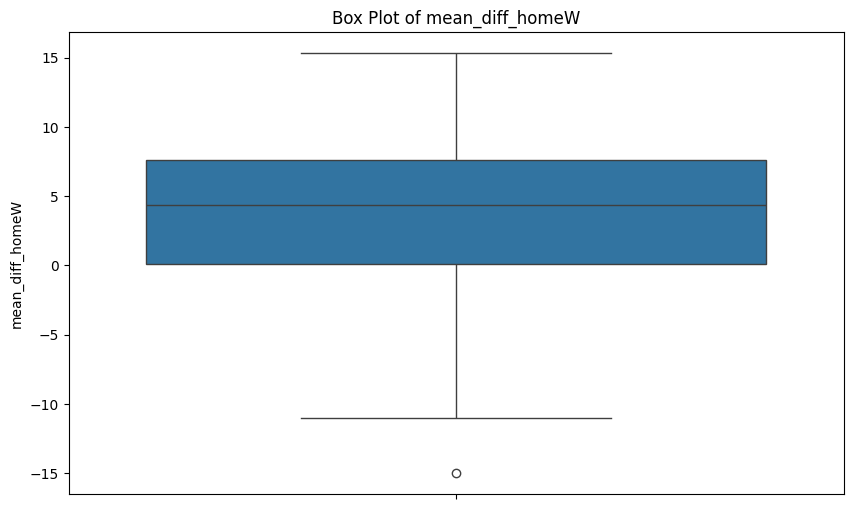

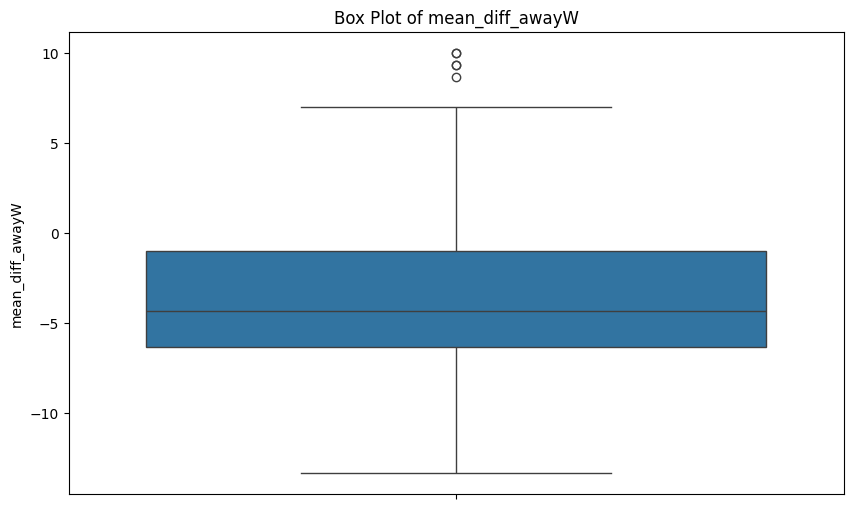

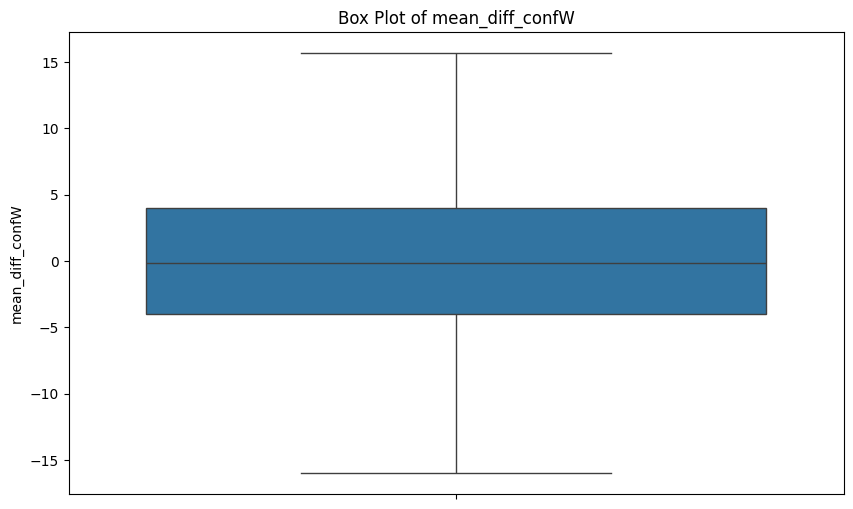

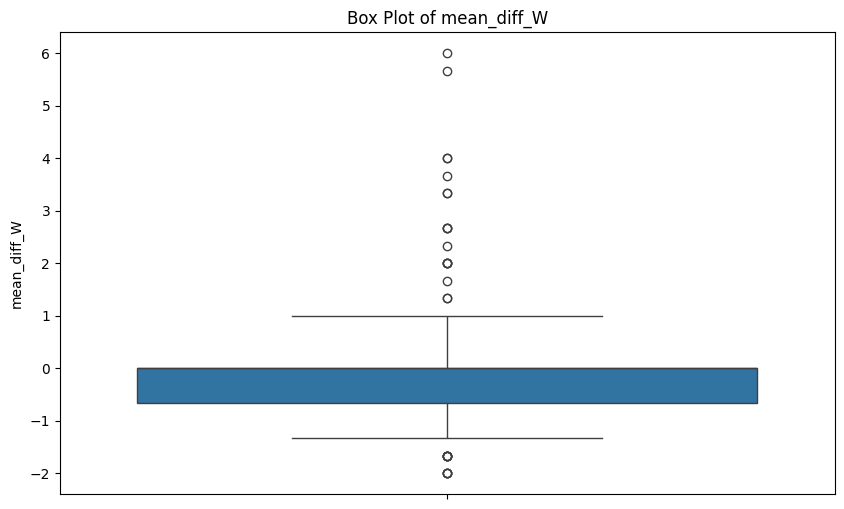

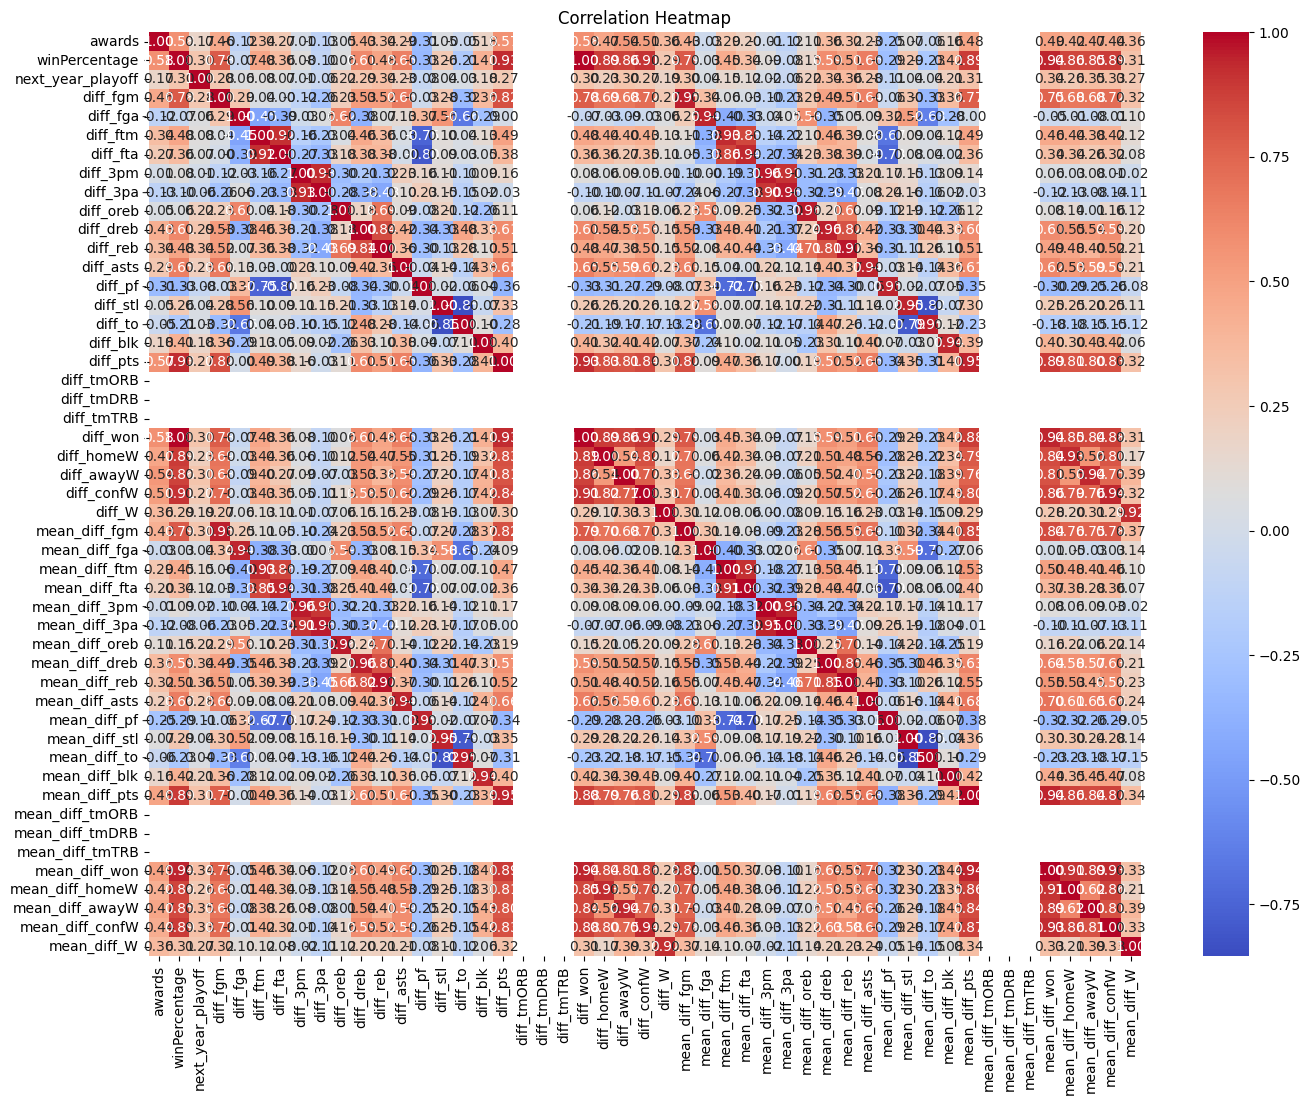

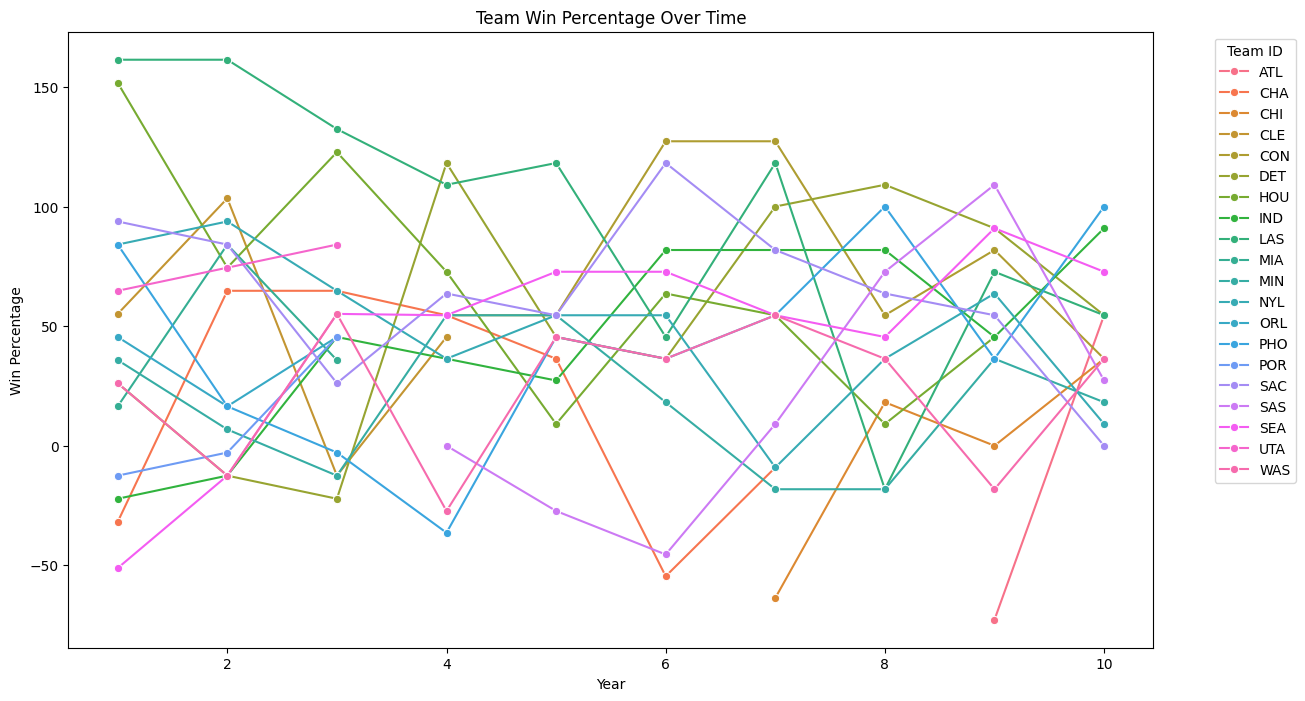

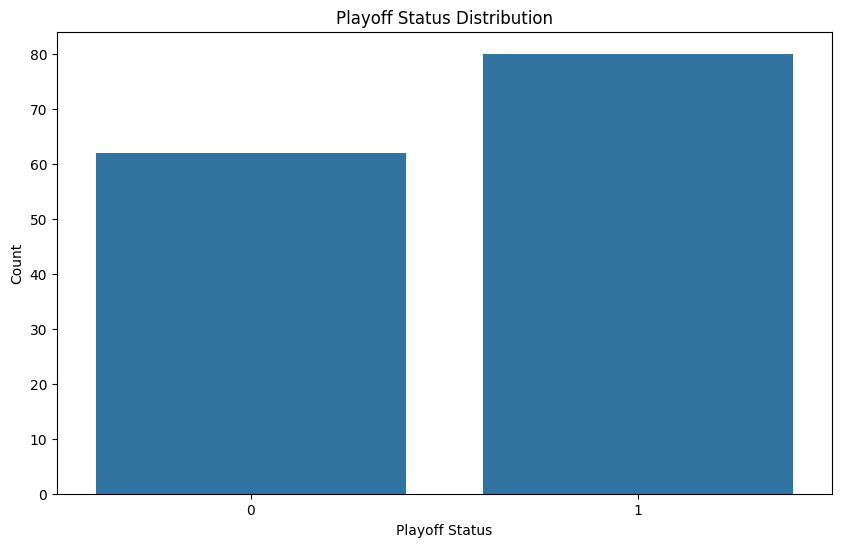

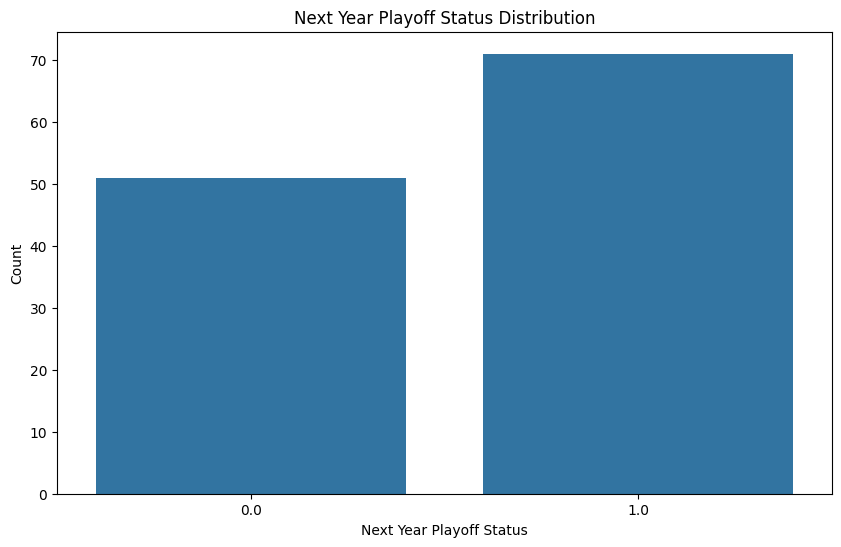

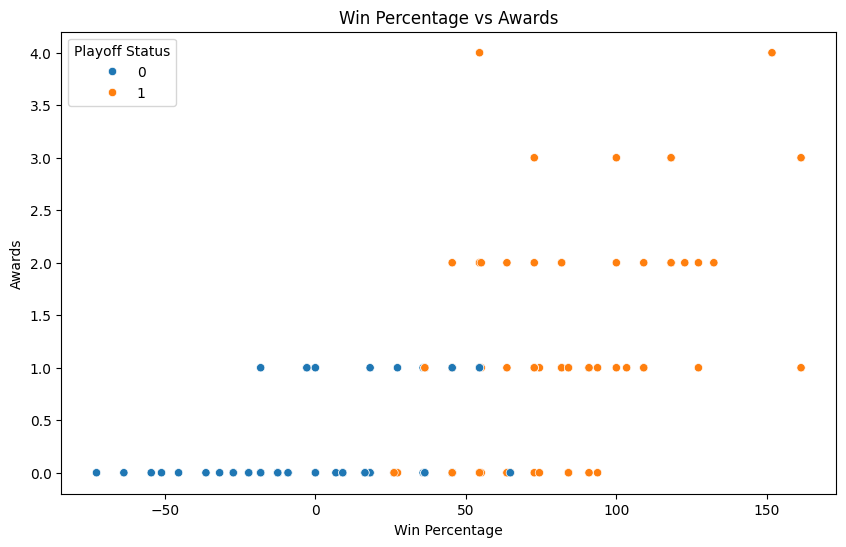

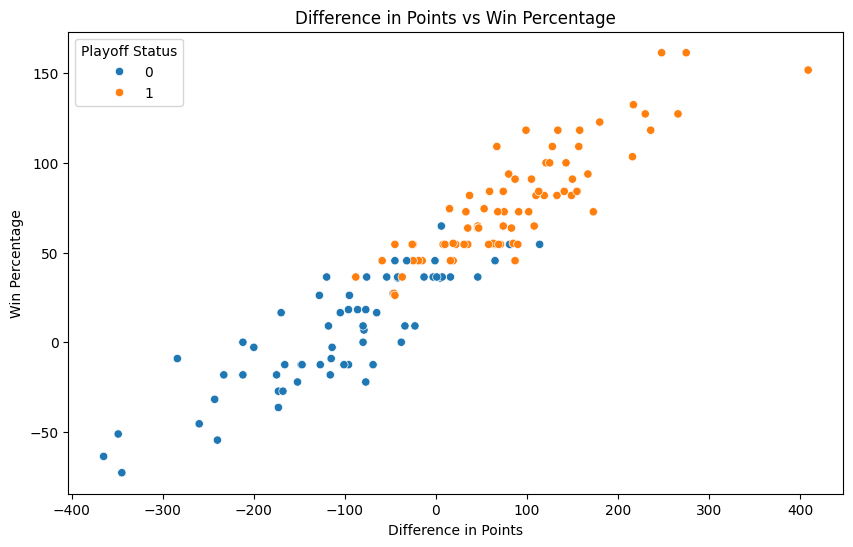

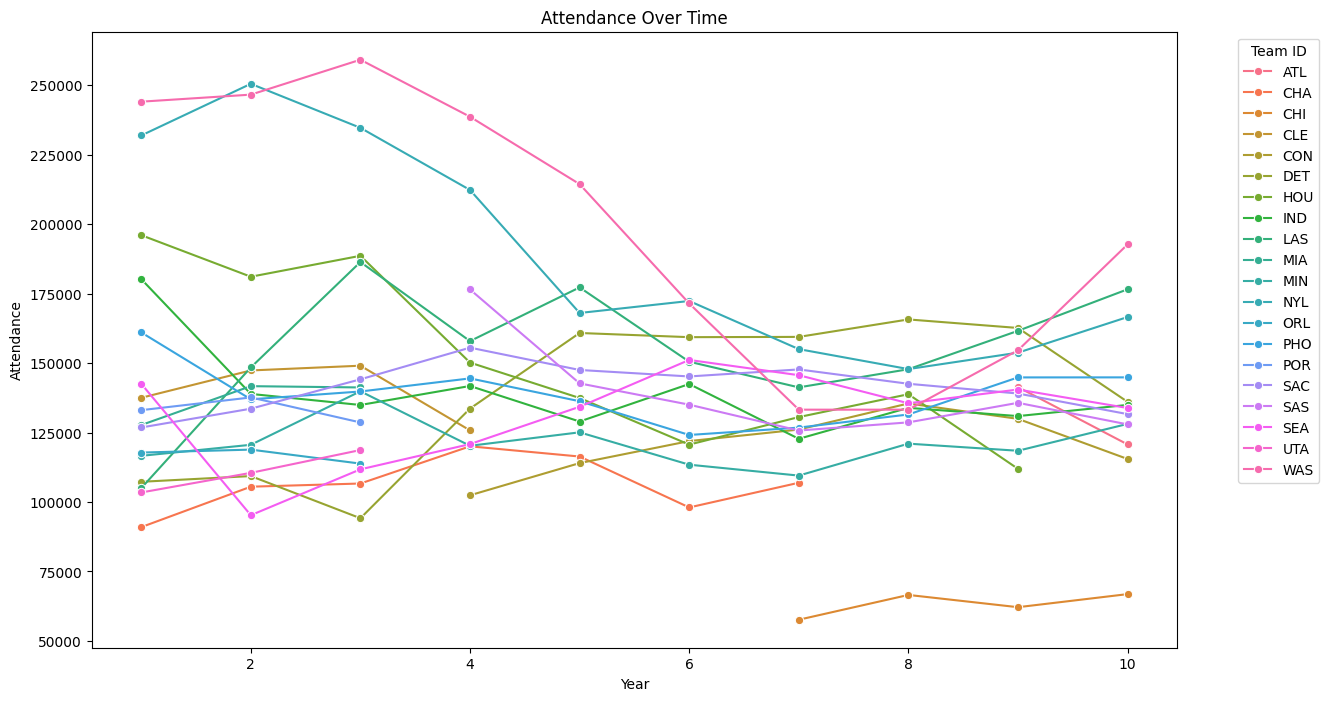

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed teams.csv file
teams = pd.read_csv("novos/teams.csv")

# Display the first few rows to verify the data
print(teams.head())

# Define the new features
new_features = ['awards', 'winPercentage', 'next_year_playoff']
diff_features = [col for col in teams.columns if col.startswith('diff_')]
mean_diff_features = [col for col in teams.columns if col.startswith('mean_diff_')]

# Distribution of New Features
for feature in new_features + diff_features + mean_diff_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(teams[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Box Plots to Identify Outliers in New Features
for feature in new_features + diff_features + mean_diff_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=teams[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = teams[new_features + diff_features + mean_diff_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Team Performance Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(data=teams, x='year', y='winPercentage', hue='tmID', marker='o')
plt.title('Team Win Percentage Over Time')
plt.xlabel('Year')
plt.ylabel('Win Percentage')
plt.legend(title='Team ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Playoff Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='playoff', data=teams)
plt.title('Playoff Status Distribution')
plt.xlabel('Playoff Status')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='next_year_playoff', data=teams)
plt.title('Next Year Playoff Status Distribution')
plt.xlabel('Next Year Playoff Status')
plt.ylabel('Count')
plt.show()

# Scatter Plots to Explore Relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(x='winPercentage', y='awards', data=teams, hue='playoff')
plt.title('Win Percentage vs Awards')
plt.xlabel('Win Percentage')
plt.ylabel('Awards')
plt.legend(title='Playoff Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='diff_pts', y='winPercentage', data=teams, hue='playoff')
plt.title('Difference in Points vs Win Percentage')
plt.xlabel('Difference in Points')
plt.ylabel('Win Percentage')
plt.legend(title='Playoff Status')
plt.show()

# Attendance Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(data=teams, x='year', y='attend', hue='tmID', marker='o')
plt.title('Attendance Over Time')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.legend(title='Team ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()